# Data visualization module
## Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

## Load the Dataset

In [2]:
FILENAME = "dataset/train_dataset.csv"

#Prepare train data
df1 = pd.read_csv(FILENAME, sep=",", low_memory=False)

print("#Righe: " + str(df1.shape[0]) + " #Colonne: " + str(df1.shape[1]))

# Converte i valori in numeri, sostituendo quelli non validi con NaN
df1["src_bytes"] = pd.to_numeric(df1["src_bytes"], errors='coerce')
# Filtra le righe con NaN (valori non convertibili)
df1 = df1.dropna(subset=["src_bytes"])
# Converte i valori rimasti in interi
df1.loc[:, "src_bytes"] = df1["src_bytes"].astype(int)

df1 = df1.dropna()
print("Dopo drop NaN")
print("#Righe: " + str(df1.shape[0]) + " #Colonne: " + str(df1.shape[1]))

features = df1.columns.difference(["type"]).tolist()
X = df1[features]
y = df1["type"]

le = preprocessing.LabelEncoder()
le.fit(y)

y = le.transform(y)

#Righe: 617002 #Colonne: 46
Dopo drop NaN
#Righe: 616983 #Colonne: 46


In [3]:
df1

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,1554350584,192.168.1.152,53972,192.168.1.152,10502,tcp,-,0.000000,0.0,0,...,0,0,-,-,-,-,-,-,0,normal
1,1556087112,192.168.1.190,37513,199.253.183.183,53,udp,dns,0.163608,47.0,423,...,0,0,-,-,-,-,-,-,0,normal
2,1556140763,192.168.1.152,2077,192.168.1.152,2077,tcp,-,0.208218,0.0,0,...,0,0,-,-,-,-,-,-,0,normal
3,1554339744,192.168.1.152,53972,192.168.1.152,10502,tcp,-,0.000000,0.0,0,...,0,0,-,-,-,-,-,-,0,normal
4,1556428704,192.168.1.152,1880,192.168.1.190,47979,tcp,-,0.000000,0.0,0,...,0,0,-,-,-,-,-,-,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616997,1556541301,192.168.1.31,53116,192.168.1.1,53,udp,dns,0.044893,84.0,424,...,0,0,-,-,-,-,-,-,1,mitm
616998,1556544621,192.168.1.31,57669,192.168.1.1,53,udp,dns,0.002957,84.0,436,...,0,0,-,-,-,-,-,-,1,mitm
616999,1556547123,192.168.1.31,54730,192.168.1.1,53,udp,dns,0.016624,58.0,178,...,0,0,-,-,-,-,-,-,1,mitm
617000,1556547464,192.168.1.34,59846,216.58.199.34,443,tcp,ssl,48.271568,3219.0,1212,...,0,0,-,-,-,-,-,-,1,mitm


## Bar Plot of Target Variable
This cell creates a bar plot to visualize the distribution of the target variable type in the DataFrame df1.

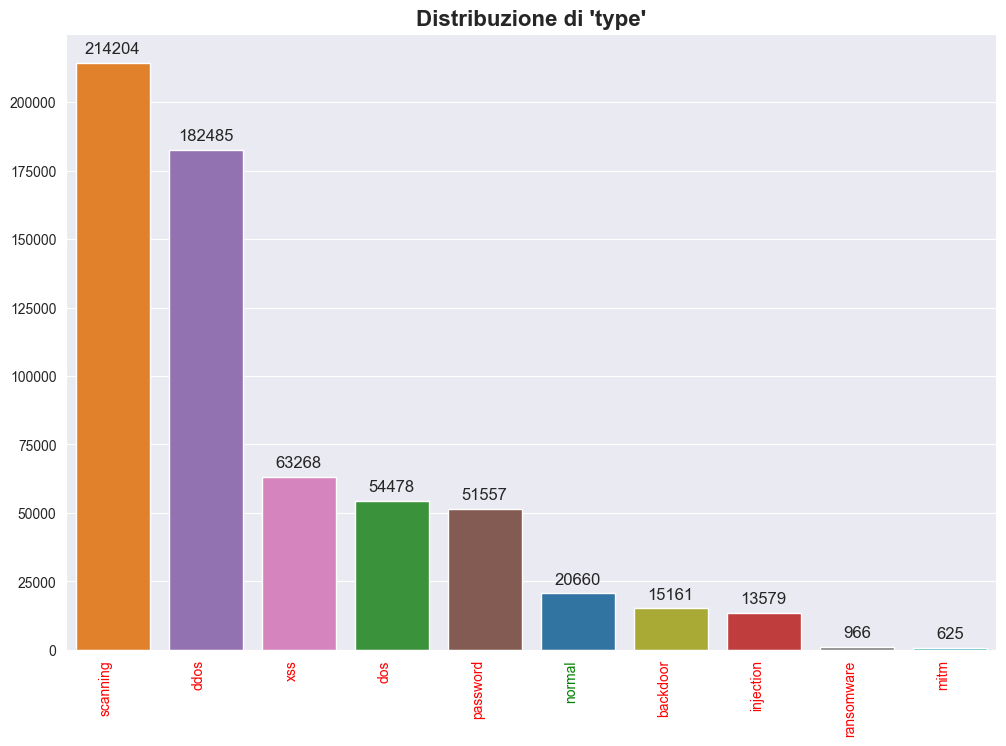

In [4]:
# Crea un grafico a barre per la distribuzione della variabile di target 'type'
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df1, x='type', hue='type', palette='tab10', order=df1['type'].value_counts().index)

# Aggiungi i conteggi sopra ogni bin
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

# Personalizza il grafico
plt.title('Distribuzione di \'type\'', fontweight='bold', fontsize=16)
plt.xlabel('')
plt.ylabel('')

# Cambia il colore delle etichette dell'asse x
for label in ax.get_xticklabels():
    if label.get_text() == 'normal':
        label.set_color('green')
    else:
        label.set_color('red')

plt.xticks(rotation=90, ha='right')
plt.show()

## Plot Categorical Feature Distributions
This cell defines a function to plot the distribution of categorical features in the DataFrame df1. It selects columns with object data types, calculates the percentage distribution for each unique value, and creates bar plots with annotated percentages for features with a limited number of unique values.

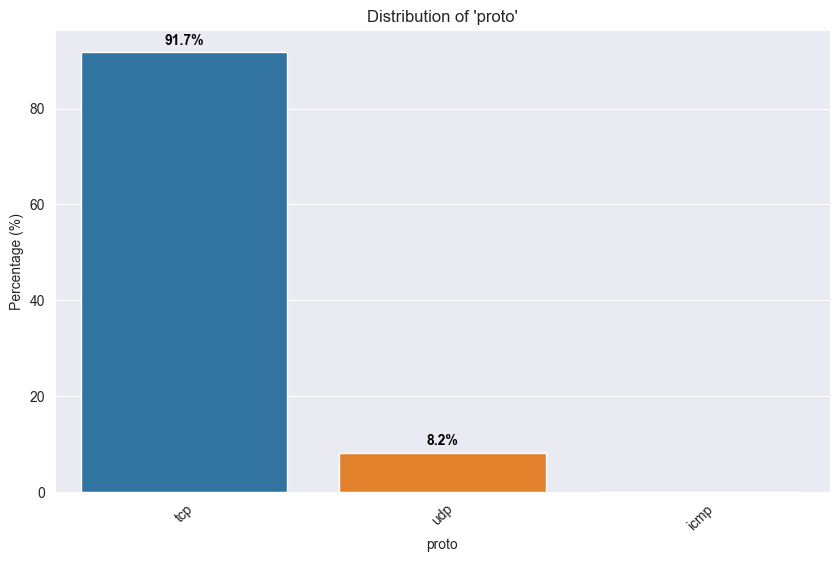

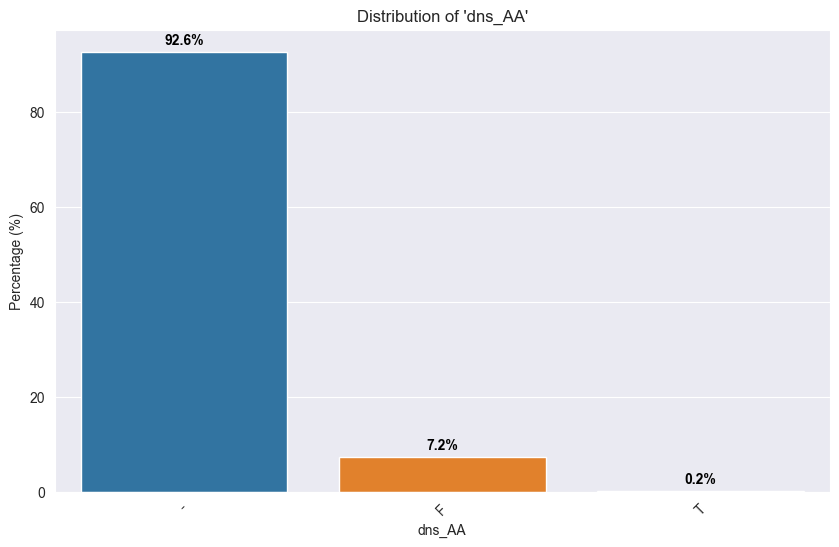

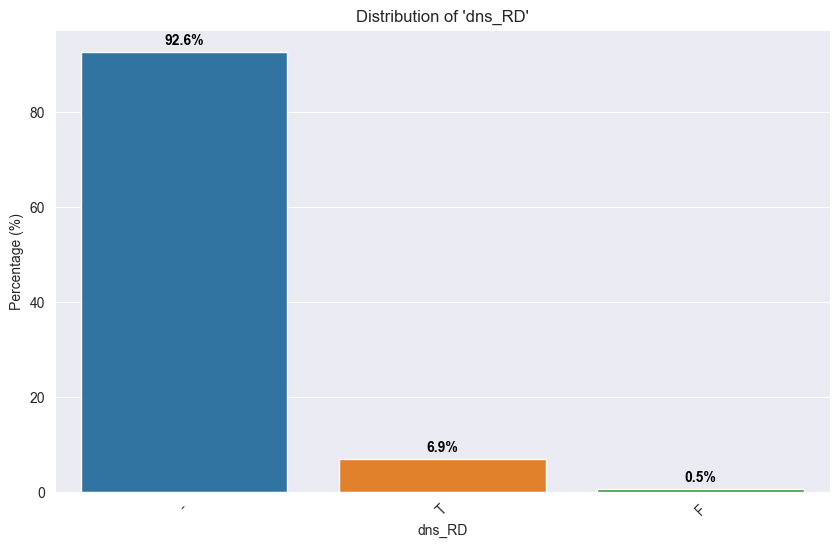

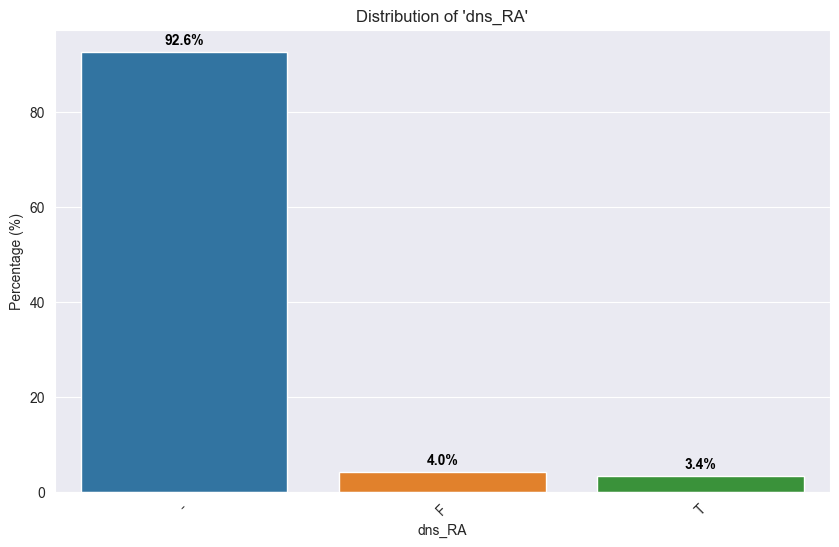

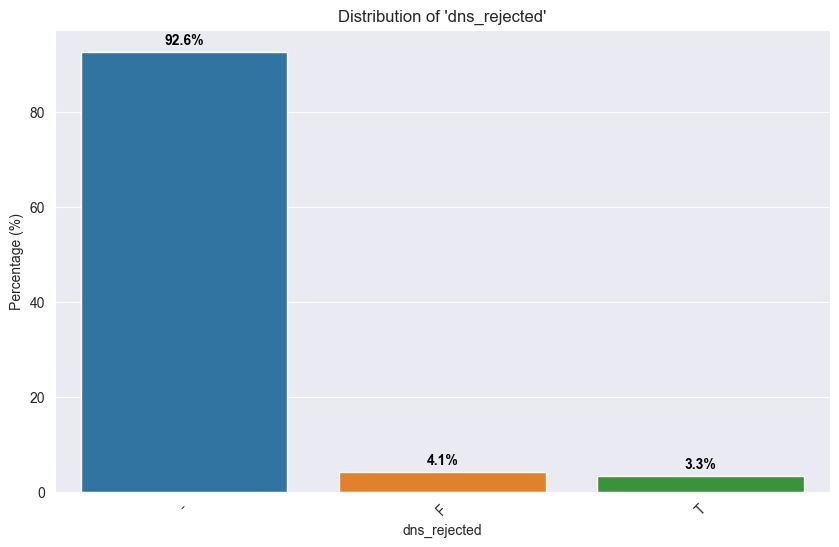

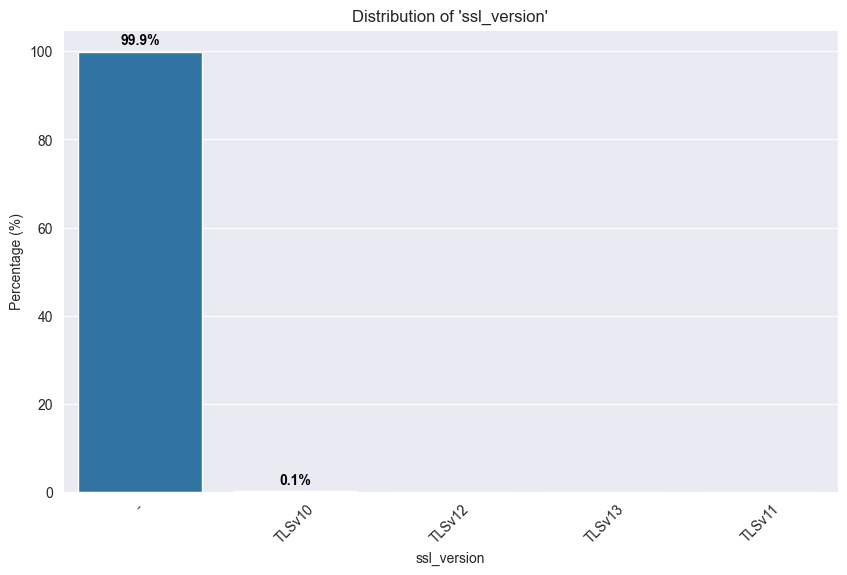

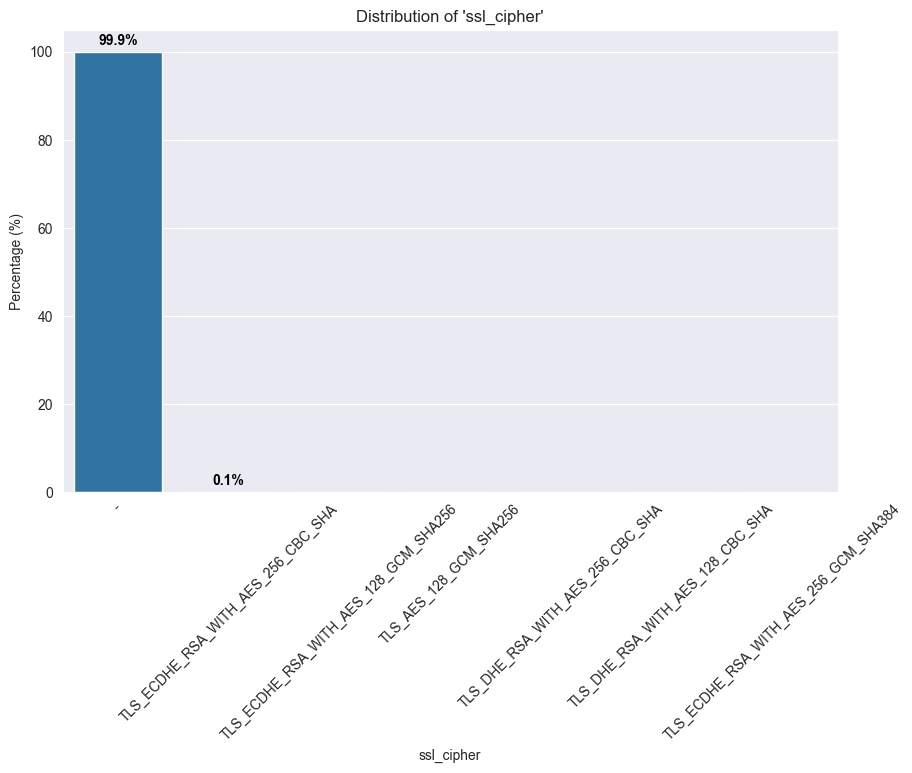

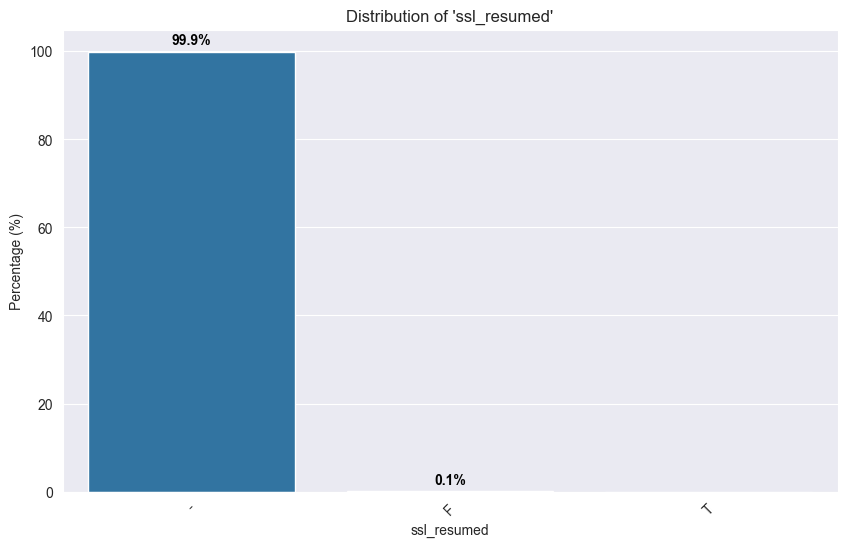

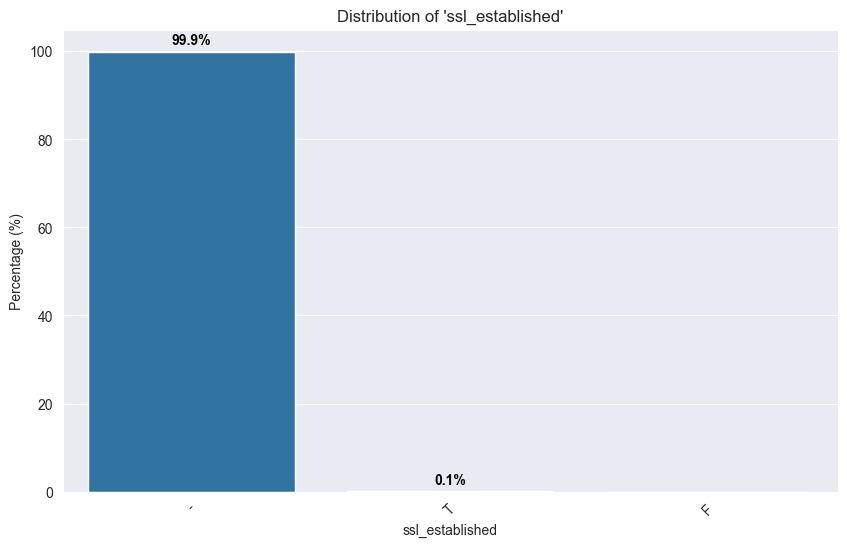

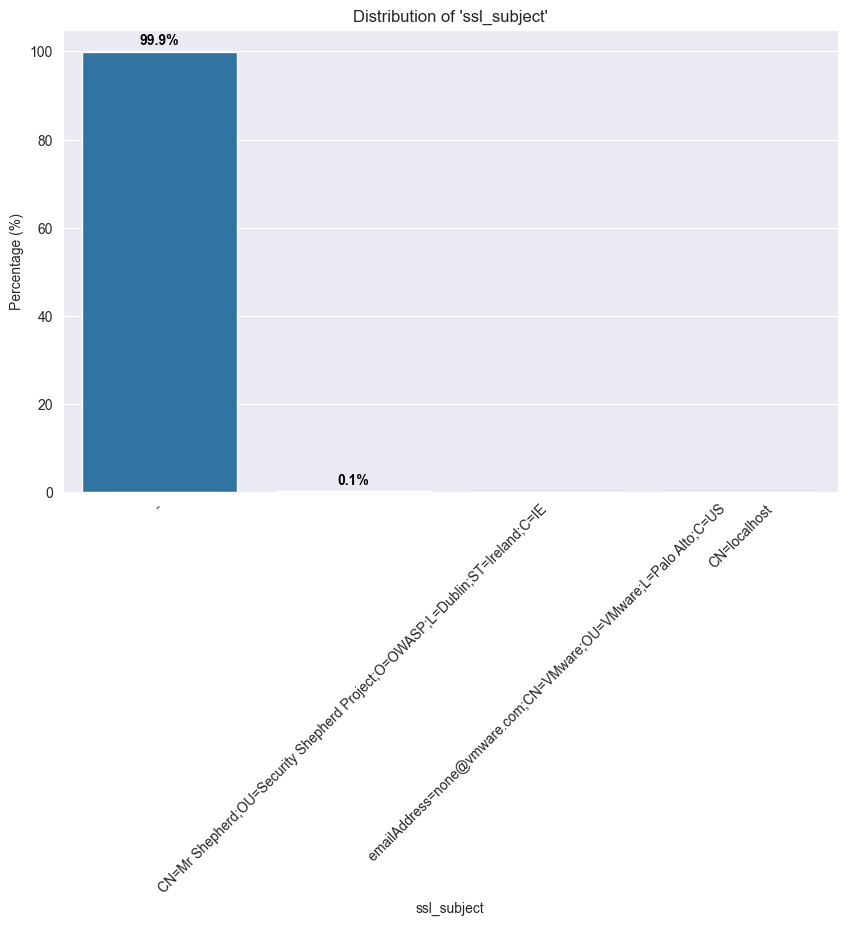

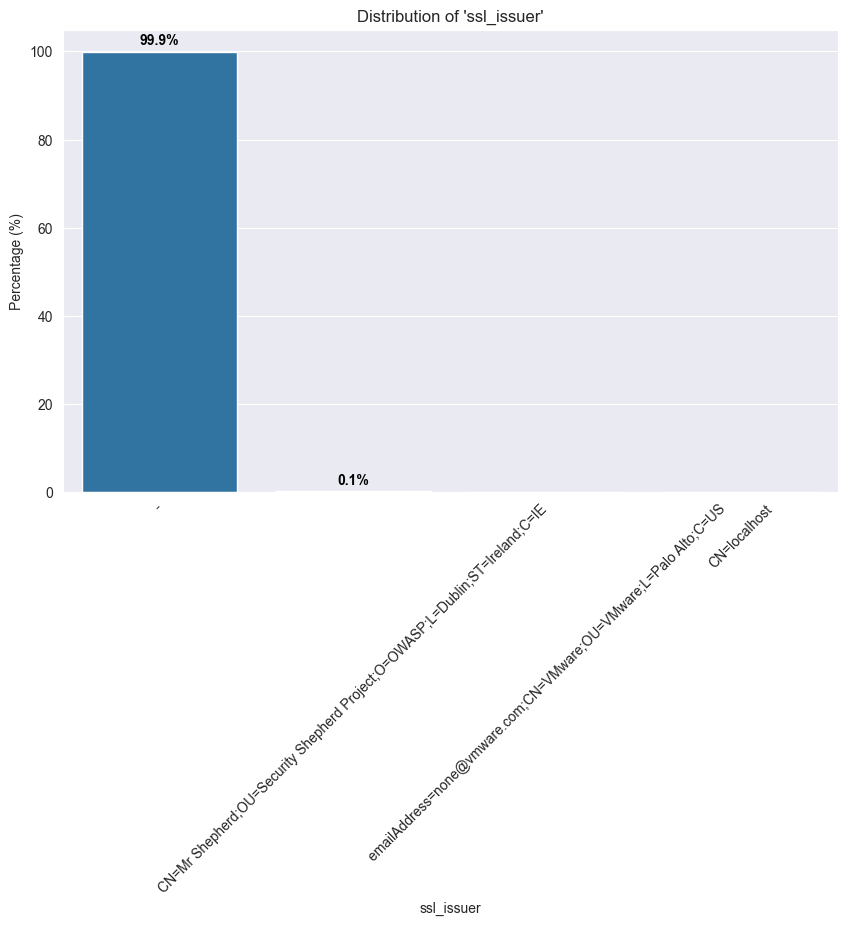

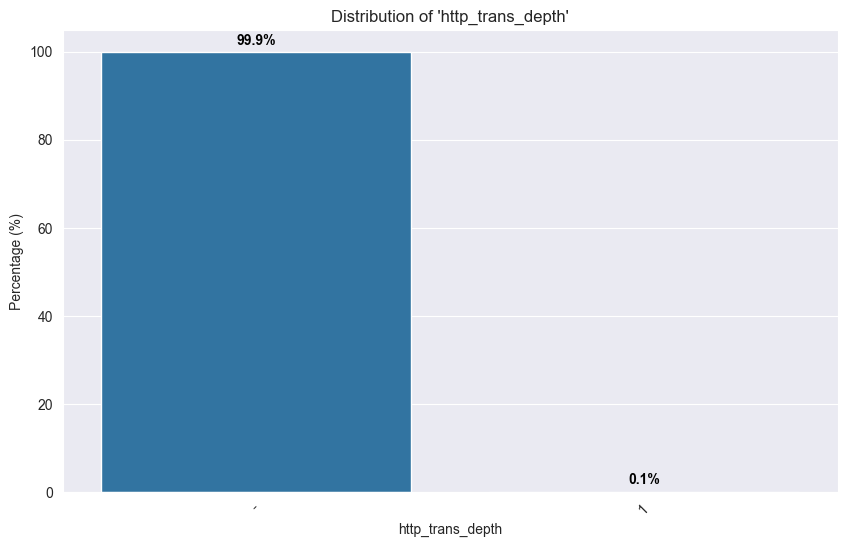

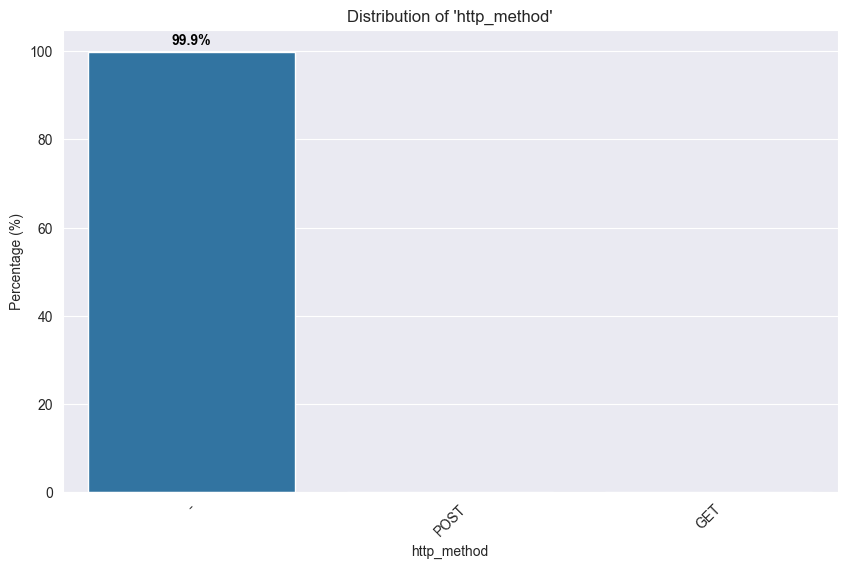

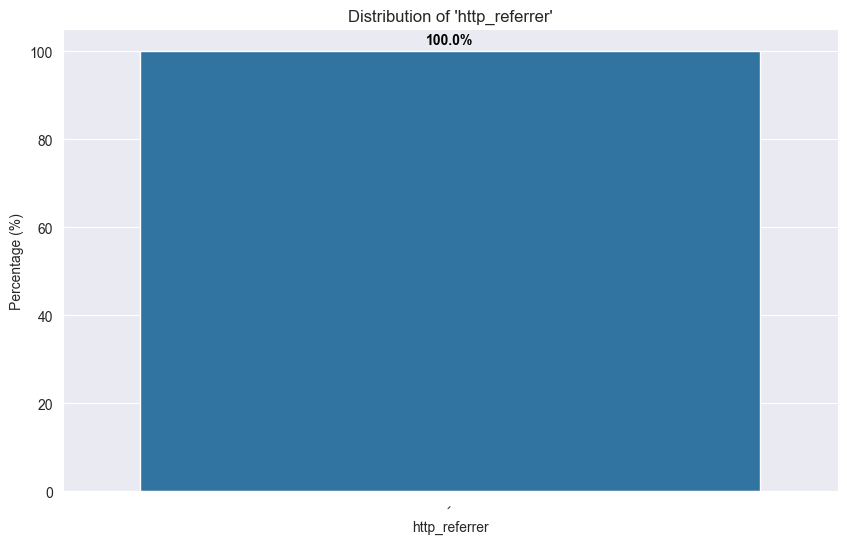

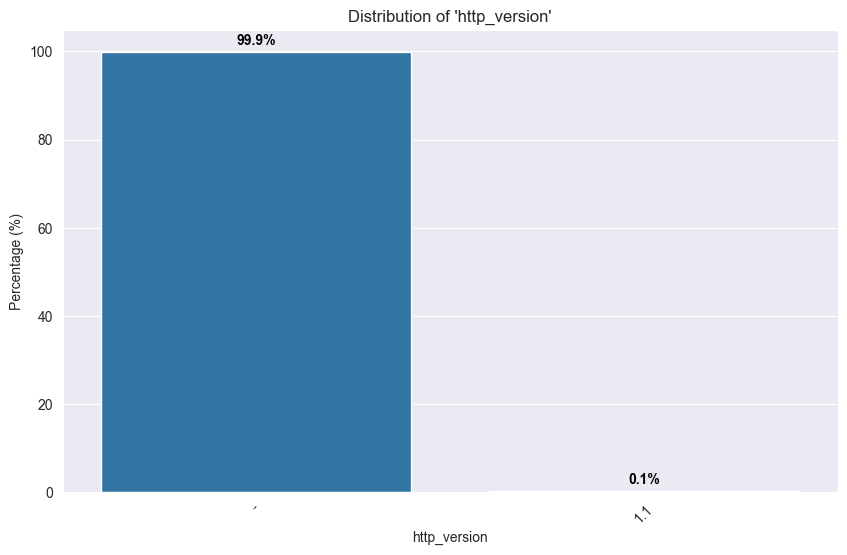

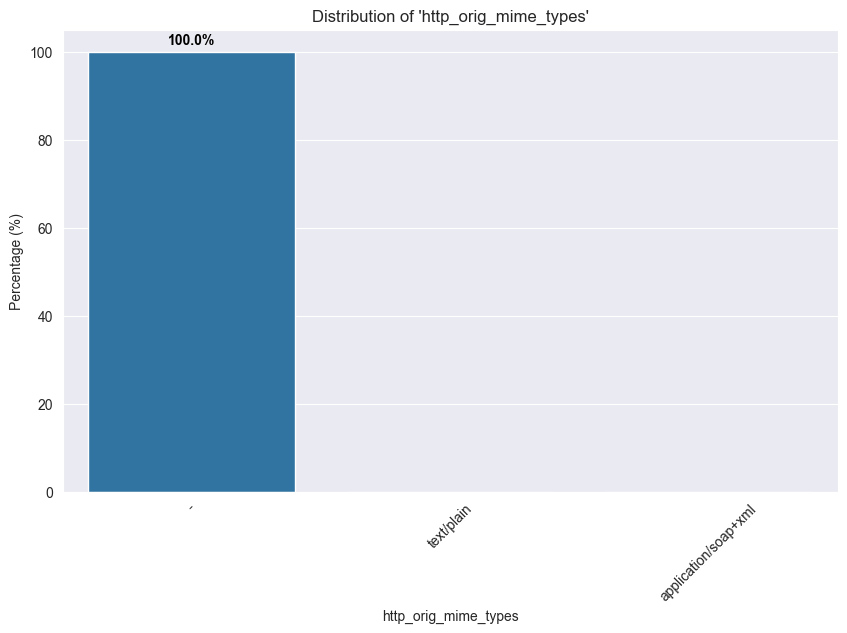

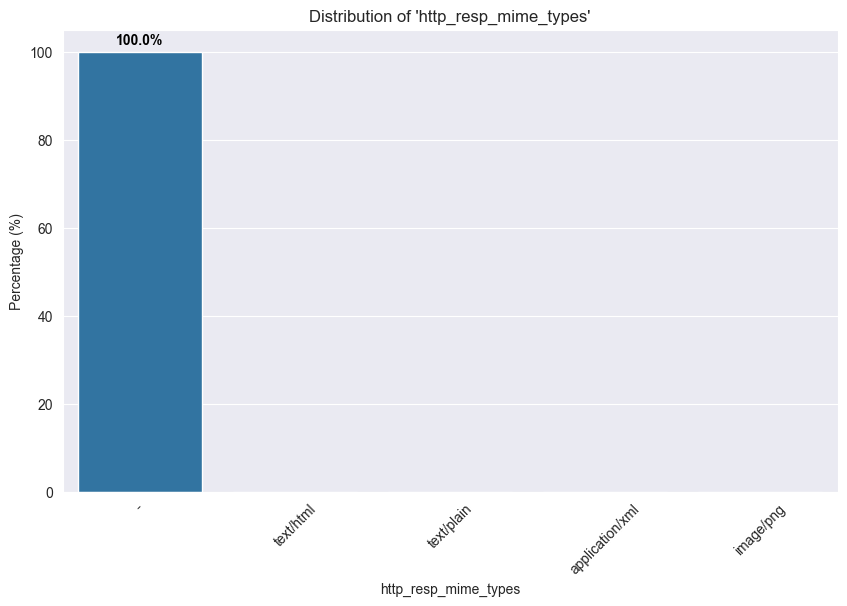

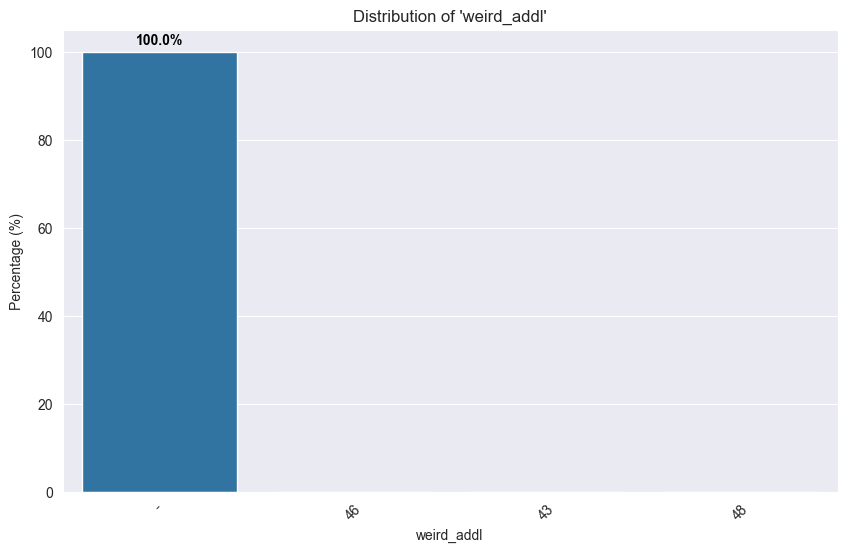

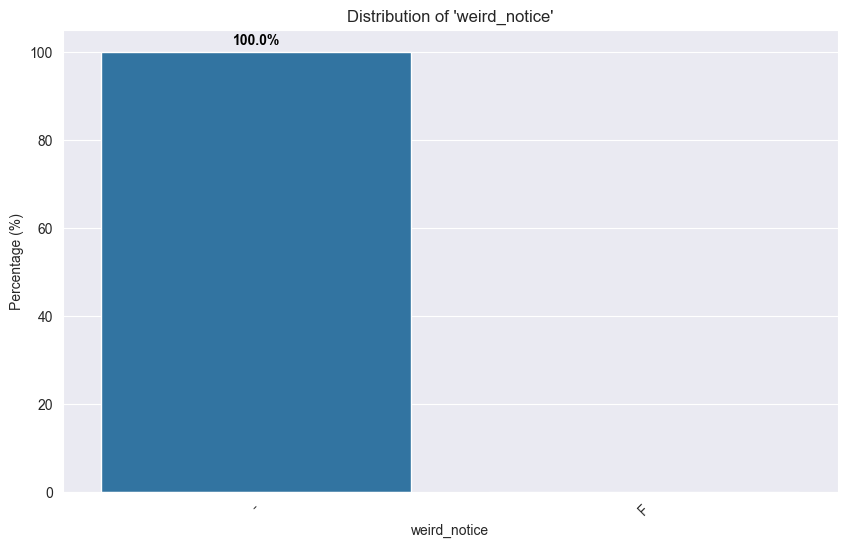

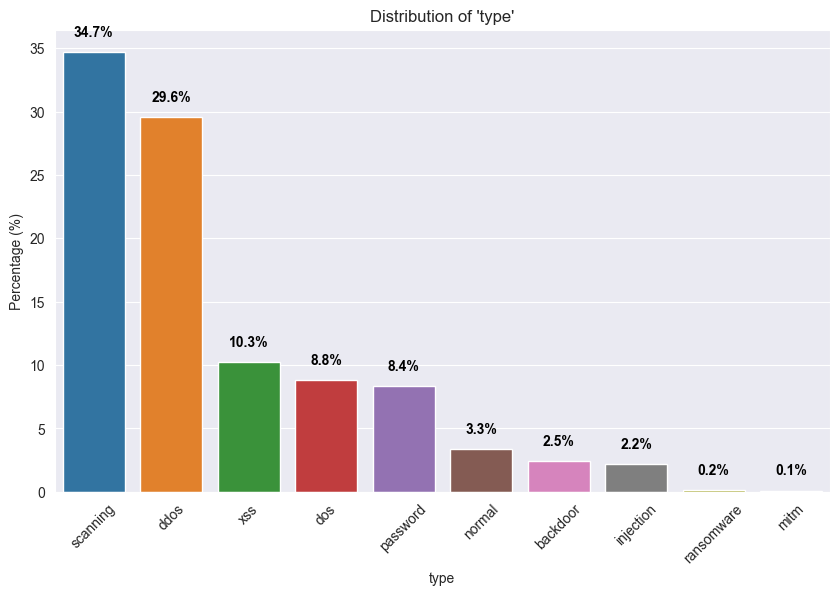

In [5]:
# get categorical columns
categorical_columns = df1.select_dtypes(include=["object"]).columns.tolist()


def plot_categorical_distribution(df, categorical_columns, max_unique_values=10):
    for col in categorical_columns:
        if df[col].nunique() <= max_unique_values:
            value_counts = df[col].value_counts(normalize=True) * 100  # Calculate percentages

            plt.figure(figsize=(10, 6))
            ax = sns.barplot(
                x=value_counts.index,
                y=value_counts.values,
                hue=value_counts.index,
                palette='tab10'
            )

            # Aggiungere le percentuali sopra ogni barra
            for p in ax.patches:
                height = p.get_height()
                if height >= 0.1:  # Evita di scrivere 0%
                    ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{height:.1f}%',
                            ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')
            plt.title(f"Distribution of '{col}'")
            plt.xlabel(col)
            plt.ylabel("Percentage (%)")
            plt.xticks(rotation=45)
            plt.show()


# Esegui la funzione
plot_categorical_distribution(df1, categorical_columns)


## Numeric feature
### Correlation Heatmap of Numerical Variables and Target
This cell selects numerical variables from the DataFrame X, excluding the columns ts and label. It then one-hot encodes the type variable and concatenates it with the selected numerical columns. The correlation matrix is calculated and a heatmap is created to visualize the correlations between the numerical variables and the target variable type.

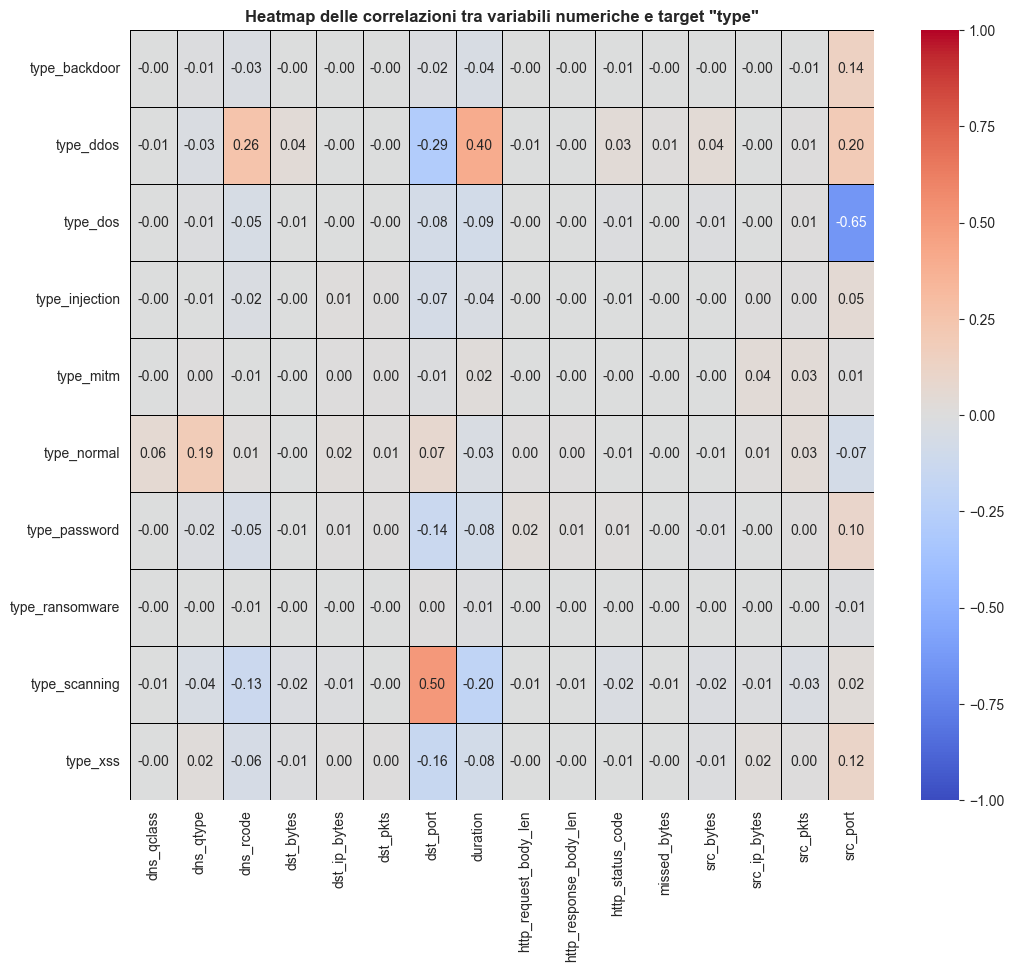

In [6]:
# Seleziona le variabili numeriche ed escludi le colonne 'ts' e 'label'
numeric_columns = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
numeric_columns = [col for col in numeric_columns if col not in ['ts', 'label']]

# One-hot encode the 'type' variable
encoded_type = pd.get_dummies(df1['type'], prefix='type')

# Concatenate the encoded 'type' variable with the numeric columns
df_encoded = pd.concat([X[numeric_columns], encoded_type], axis=1)

# Calcola la matrice di correlazione
correlation_matrix = df_encoded.corr().iloc[16:, :16]

# Crea una heatmap delle correlazioni senza annotazioni e con bordo nero tra le celle
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1, linecolor='black', linewidths=0.5)
plt.title('Heatmap delle correlazioni tra variabili numeriche e target "type"', fontweight='bold')
plt.show()

### Histograms of Features Correlated with Target
This cell lists columns in the correlation matrix with a correlation greater than 0.25 with any type. It then creates histograms for these features, showing their distribution with respect to the target variable type.

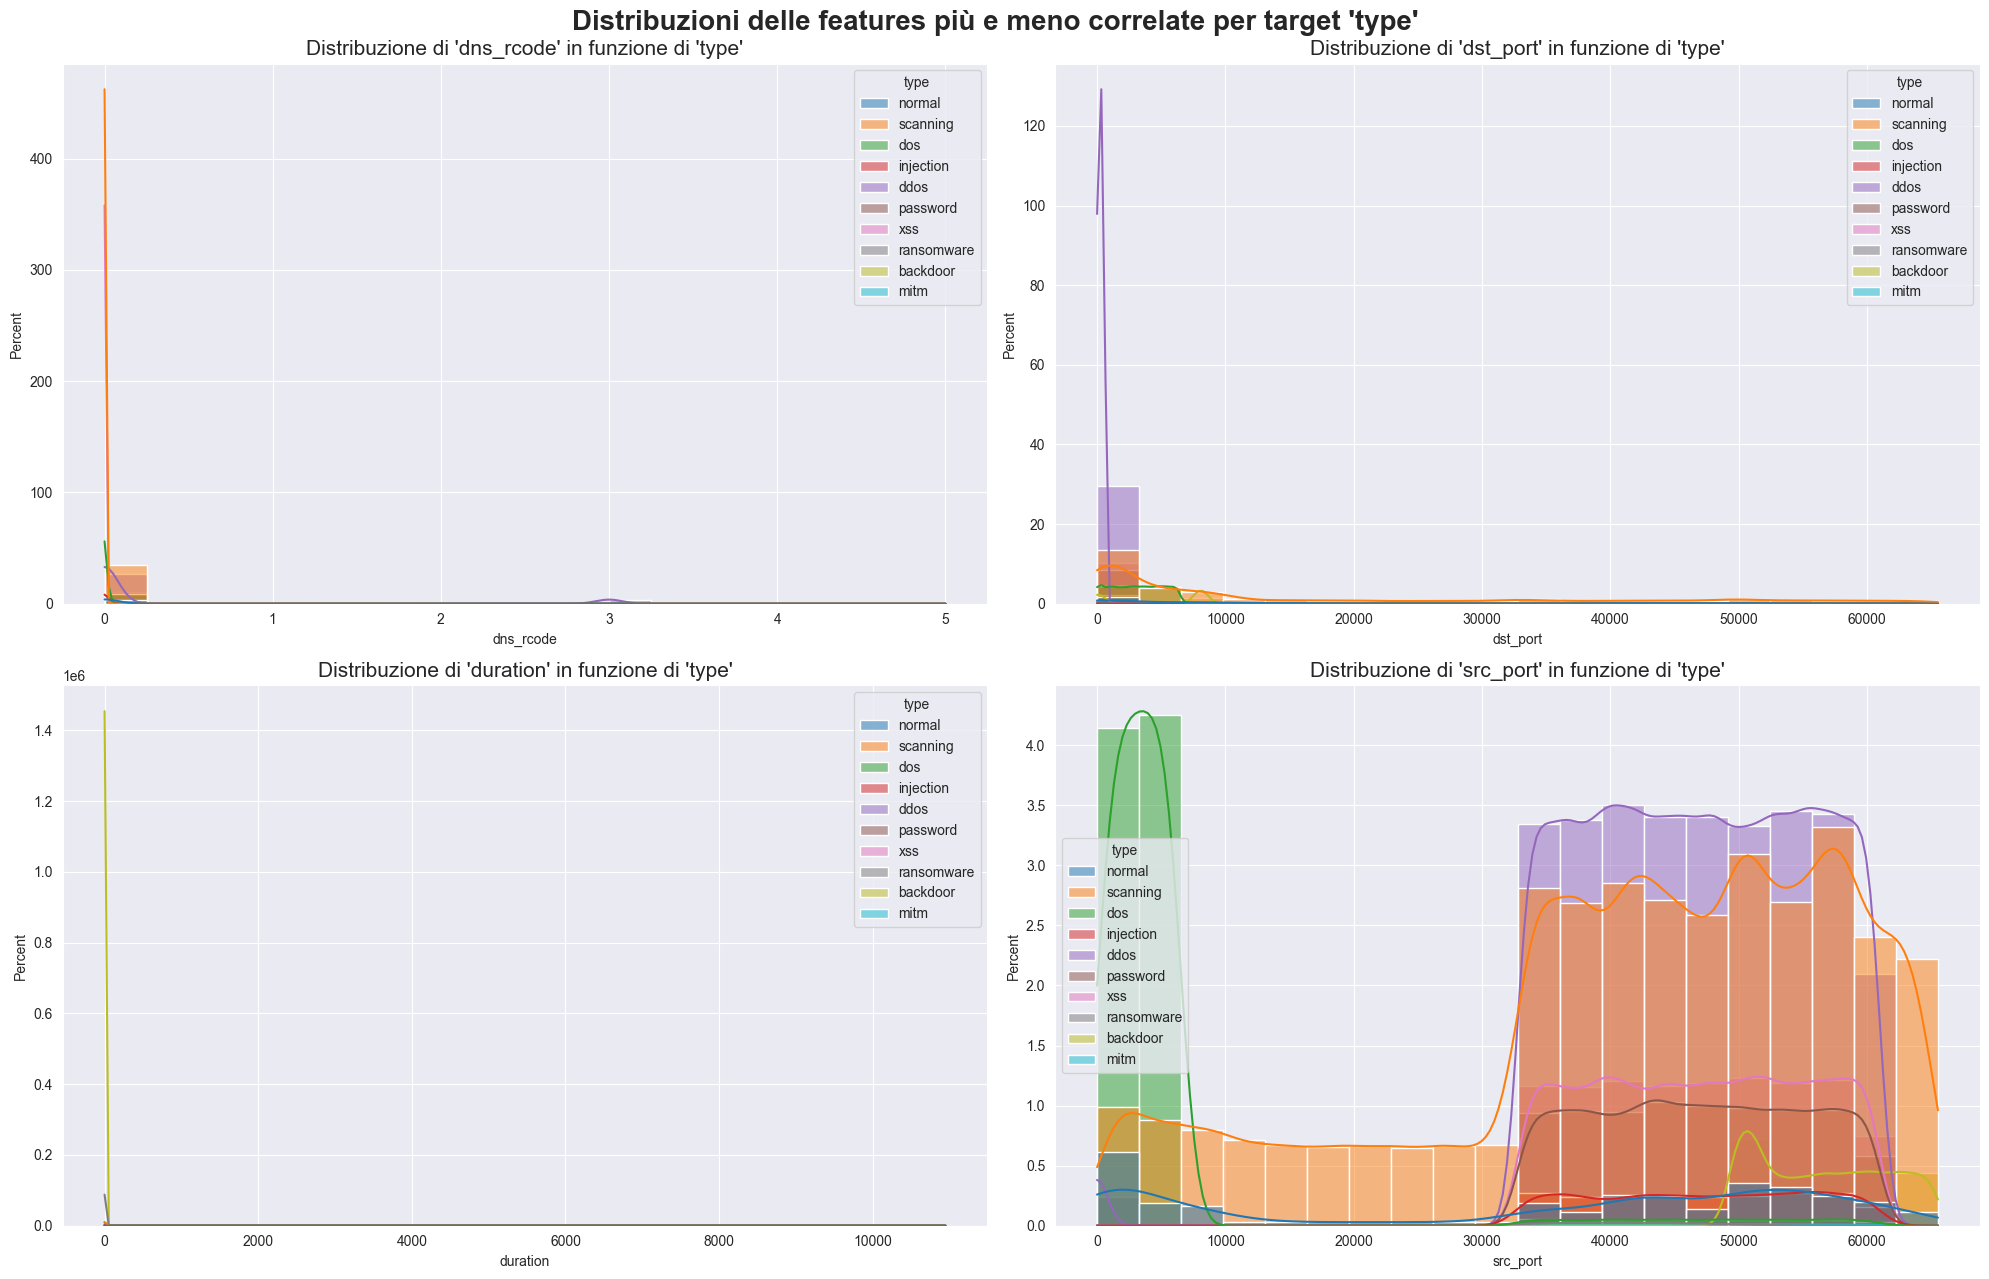

In [7]:
# list columns in correlation_matrix with a correlation > 0.25 with any type
feature_corr = [col for col in correlation_matrix.columns if any(abs(correlation_matrix[col]) >= 0.25)]

# Lista delle feature continue e della variabile target
# feature_corr = ['dst_port', 'src_port', 'duration', 'dns_rcode']
target = 'type'

# Numero di colonne e righe per i sottografi
n_cols = 2
n_rows = int(np.ceil(len(feature_corr) / n_cols))

# Creazione del grafico
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 13))

# Se c'è un solo grafico, assicuriamoci che axes sia una lista
if n_rows * n_cols == 1:
    axes = [axes]

# Flatten degli assi nel caso di più righe/colonne
axes = np.ravel(axes)

bins = 20  # Numero di bins per gli istogrammi
custom_palette = sns.color_palette("tab10")  # Scegli una palette diversa

for i, column in enumerate(feature_corr):
    ax = sns.histplot(
        x=column,
        data=df1,  # Sostituisci 'df' con il tuo DataFrame
        hue=target,
        ax=axes[i],
        bins=bins,
        stat="percent",
        kde=True,
        legend=True,
        palette=custom_palette  # Applica la palette personalizzata
    )
    axes[i].set_title(f'Distribuzione di \'{column}\' in funzione di \'type\'', size=15)

# Rimuove assi vuoti (se presenti)
for j in range(len(feature_corr), len(axes)):
    fig.delaxes(axes[j])

# Titolo generale del grafico
fig.suptitle('Distribuzioni delle features più e meno correlate per target \'type\'', fontsize=20, fontweight='bold')
fig.tight_layout()
plt.show()

### Boxplots of Numerical Features by Target
This cell creates boxplots for numerical features that are highly correlated with the target variable type.

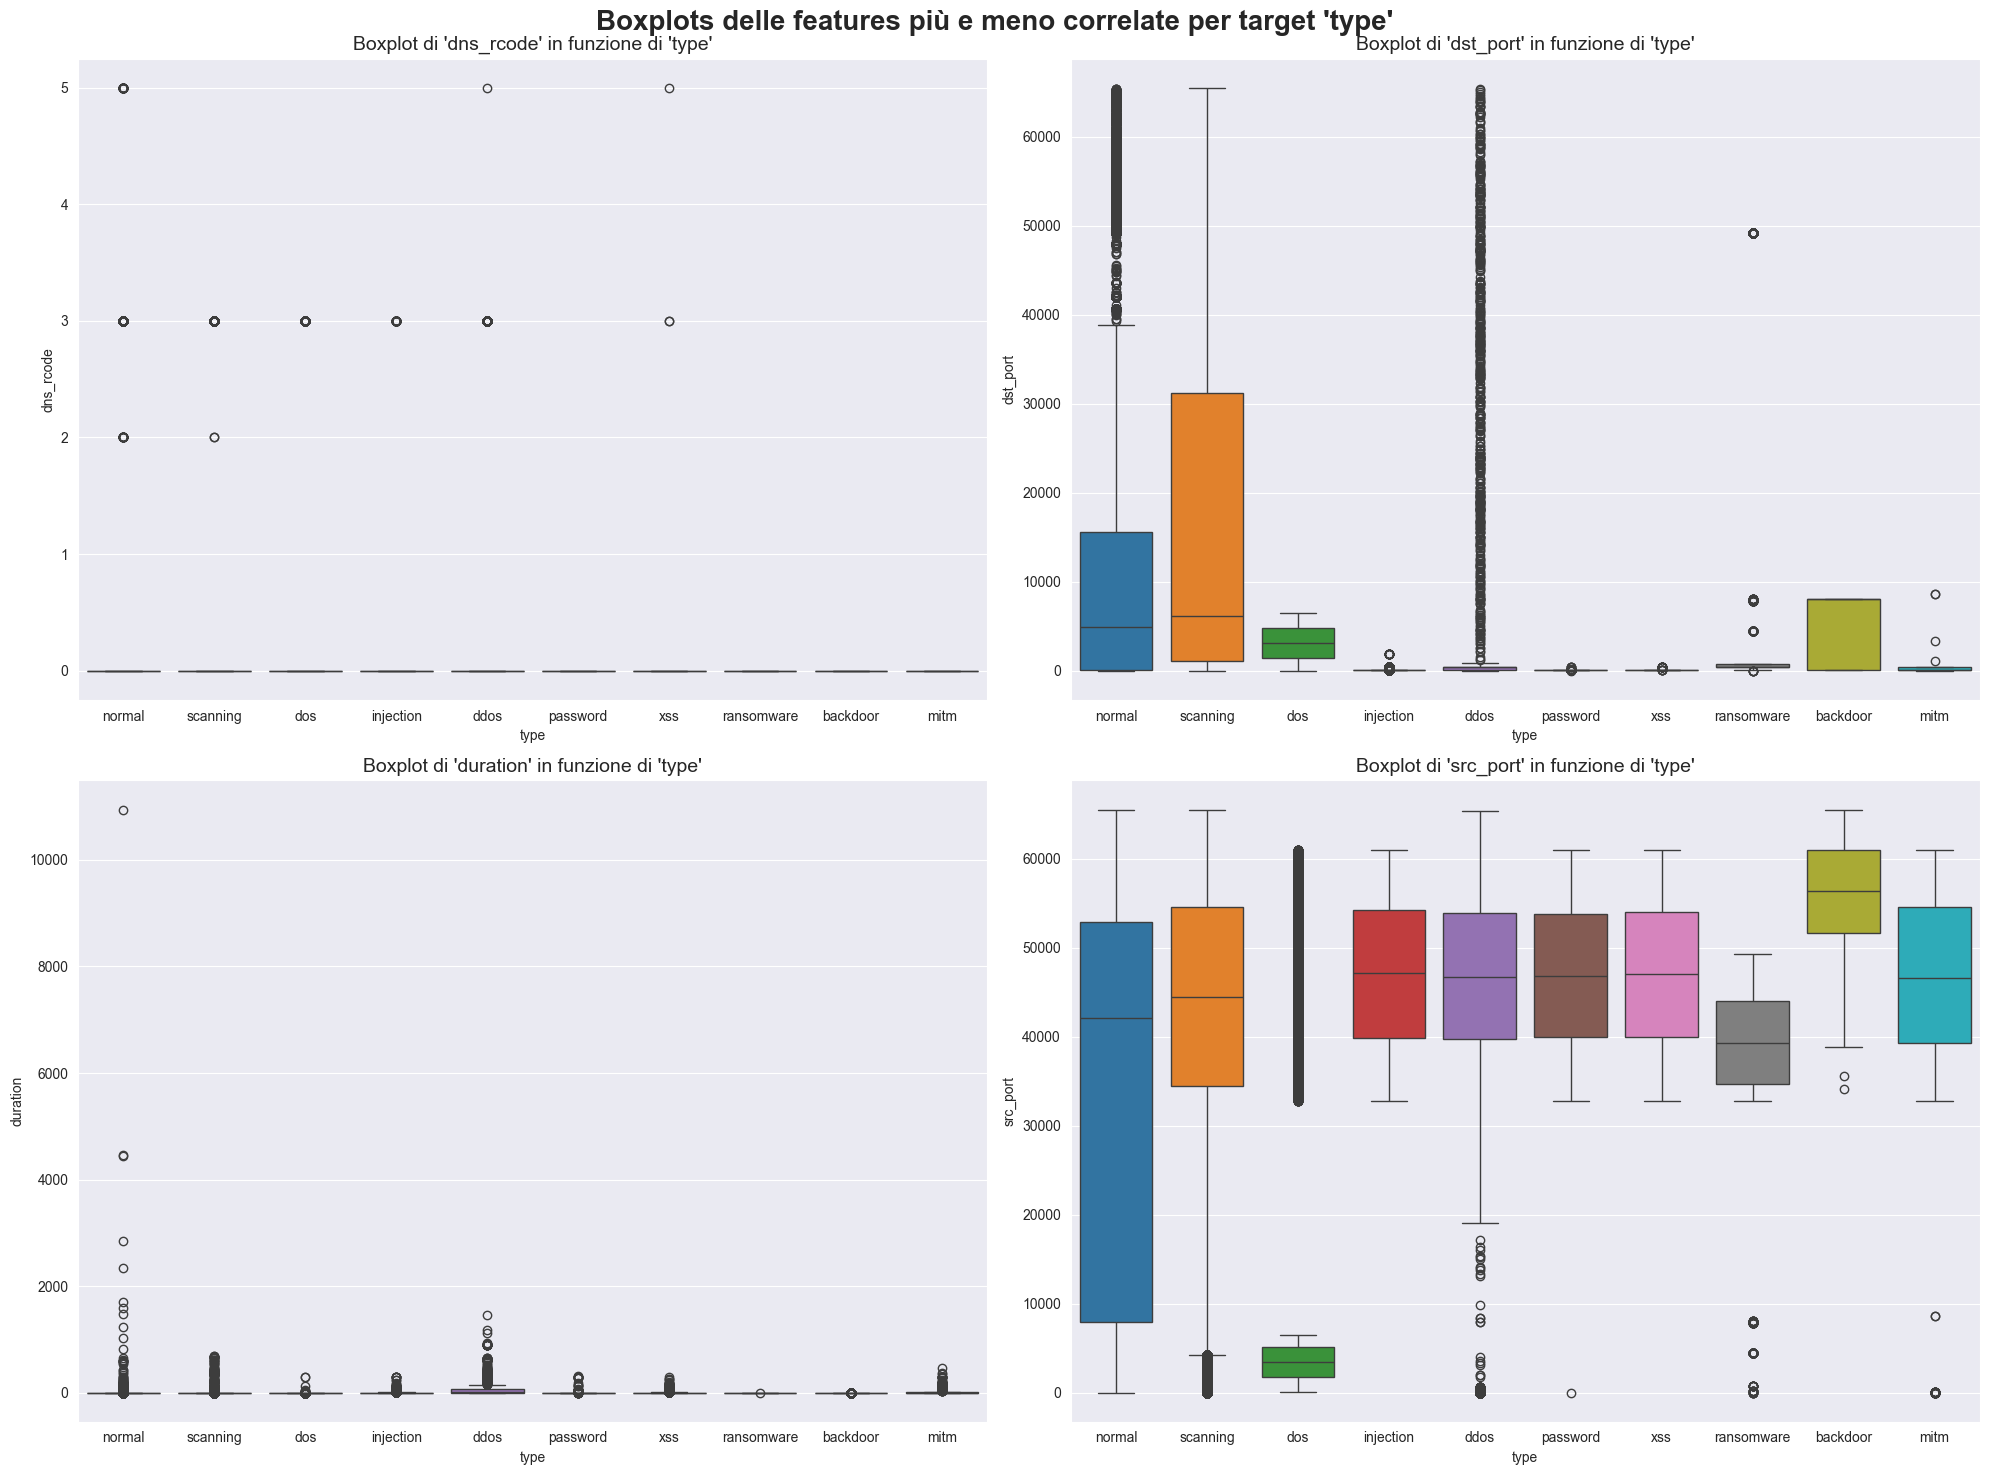

In [8]:
n_cols = 2
n_rows = int(np.ceil(len(feature_corr) / n_cols))

# Creazione del grafico
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 15))

# Flatten degli assi nel caso di più righe/colonne
axes = np.ravel(axes)

for i, column in enumerate(feature_corr):
    sns.boxplot(
        x=target,
        y=column,
        data=df1,  # Sostituisci 'df' con il tuo DataFrame
        ax=axes[i],
        hue=target,
        palette="tab10"  # Palette di colori personalizzata
    )
    axes[i].set_title(f'Boxplot di \'{column}\' in funzione di \'{target}\'', size=14)
    axes[i].set_xlabel(target)
    axes[i].set_ylabel(column)

# Rimuove assi vuoti (se presenti)
for j in range(len(feature_corr), len(axes)):
    fig.delaxes(axes[j])

# Titolo generale del grafico
fig.suptitle('Boxplots delle features più e meno correlate per target \'type\'', fontsize=20, fontweight='bold')
fig.tight_layout()
plt.show()

## Categorical feature
### Plot Normalized Categorical Distributions by Target
This cell defines a function to plot the normalized distribution of categorical features in the DataFrame df1 with respect to the target variable type. It calculates the percentage distribution for each unique value within each target category and creates bar plots with annotated percentages.

proto


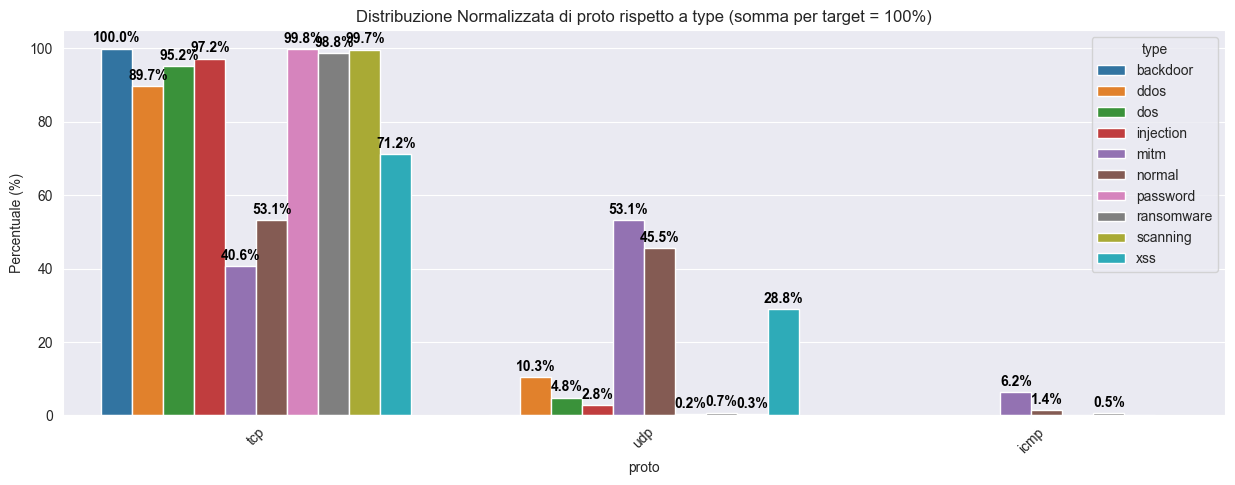

conn_state


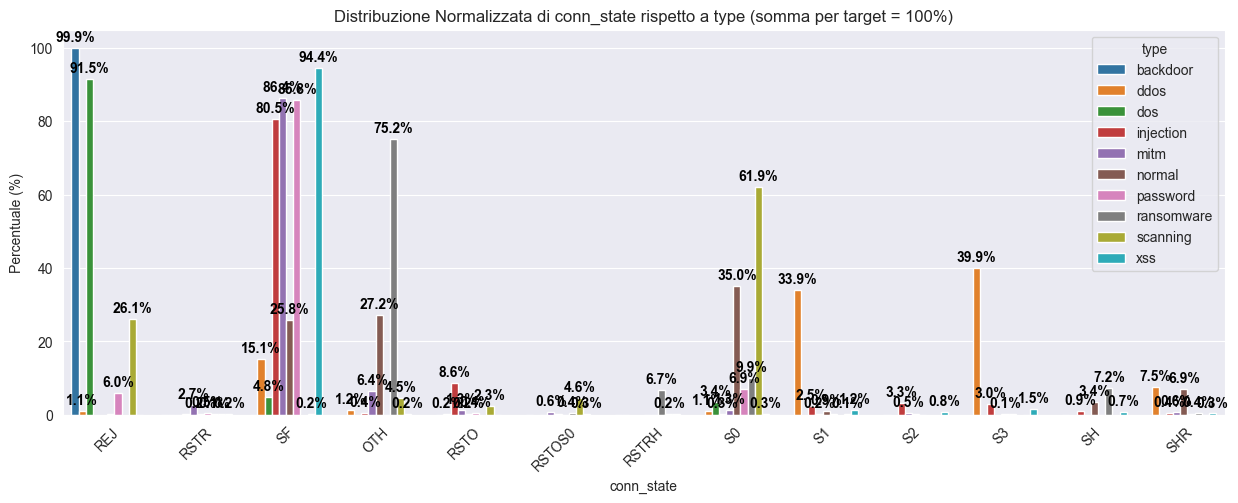

dns_AA


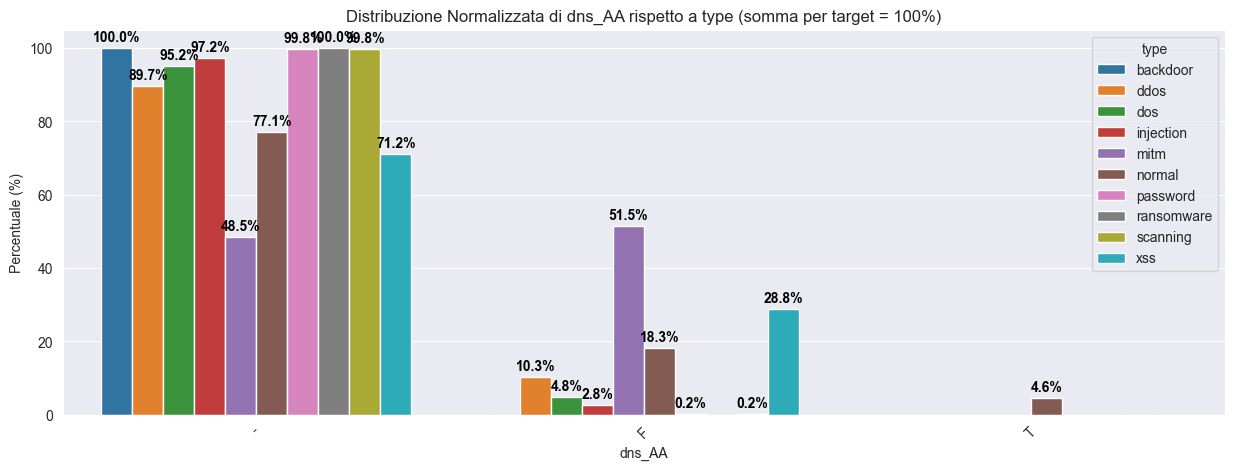

dns_RD


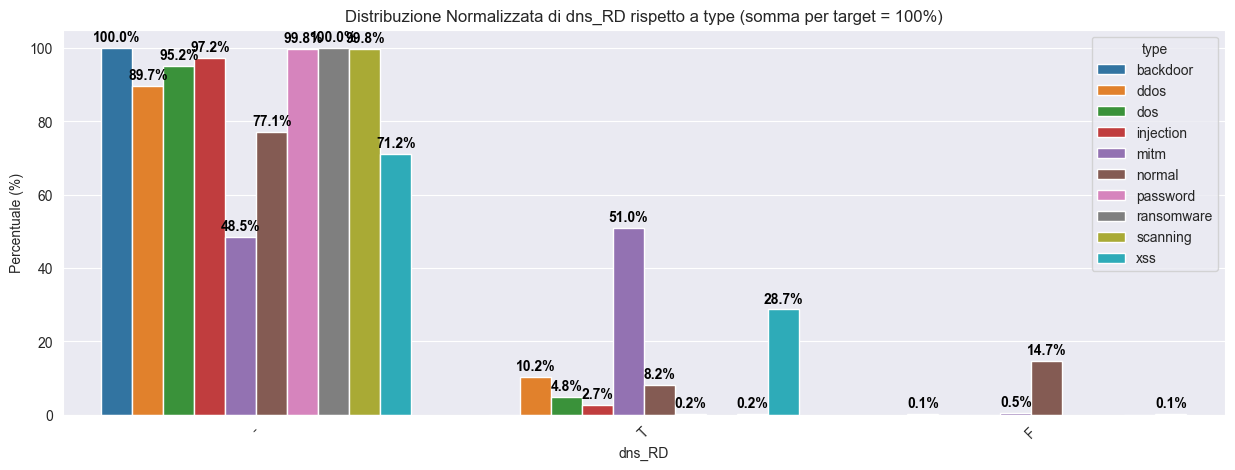

dns_RA


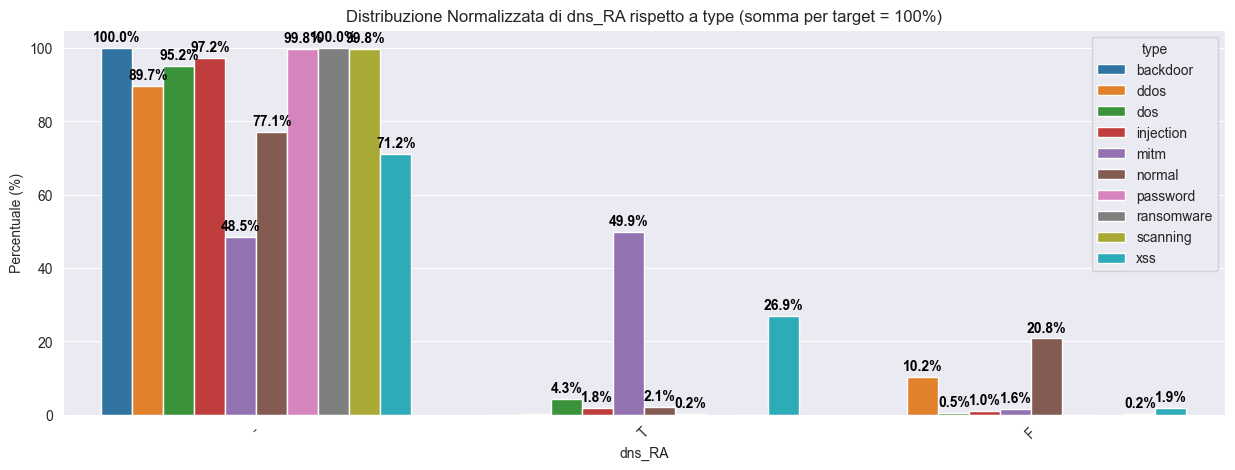

dns_rejected


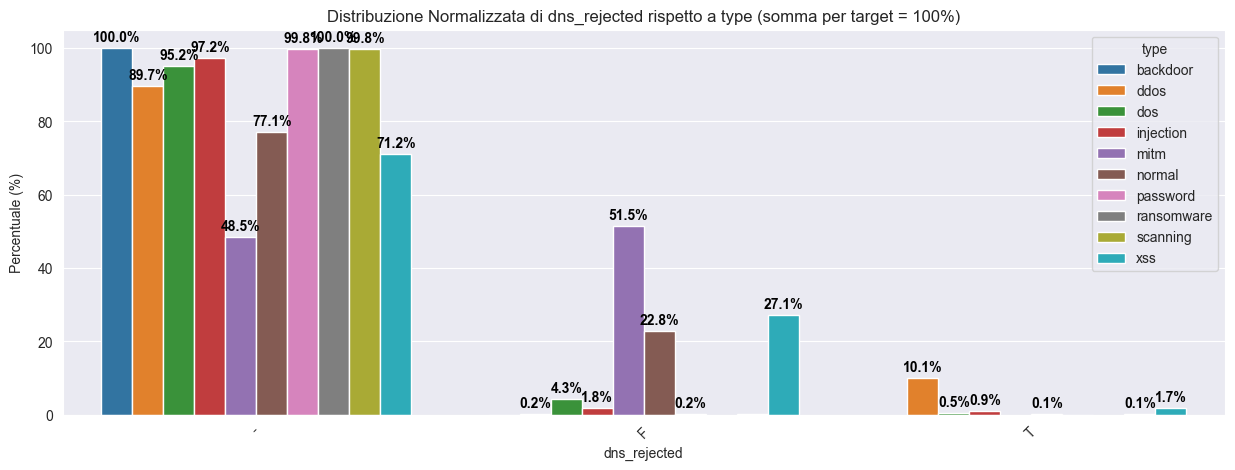

ssl_version


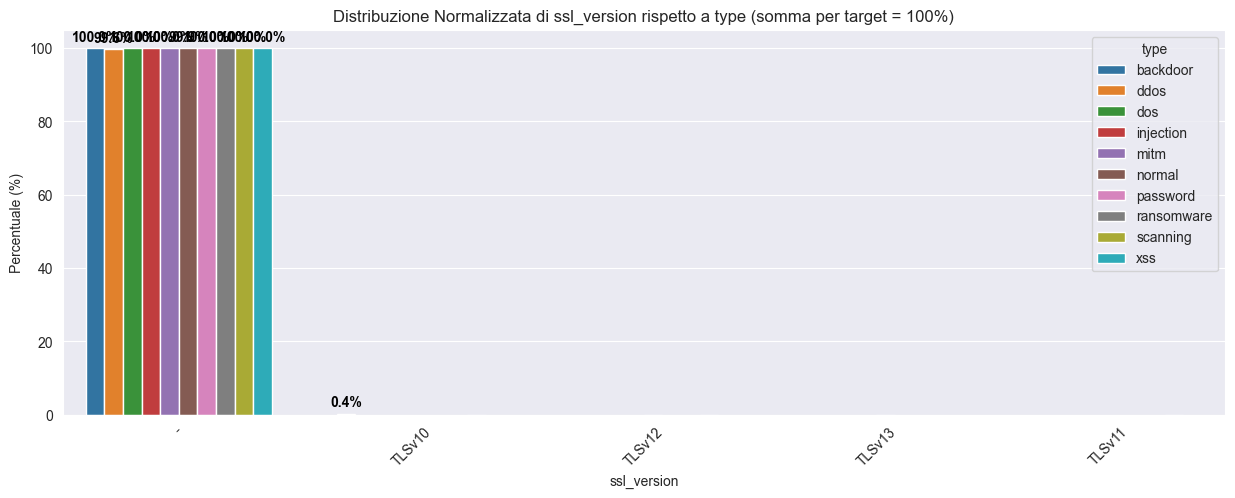

ssl_cipher


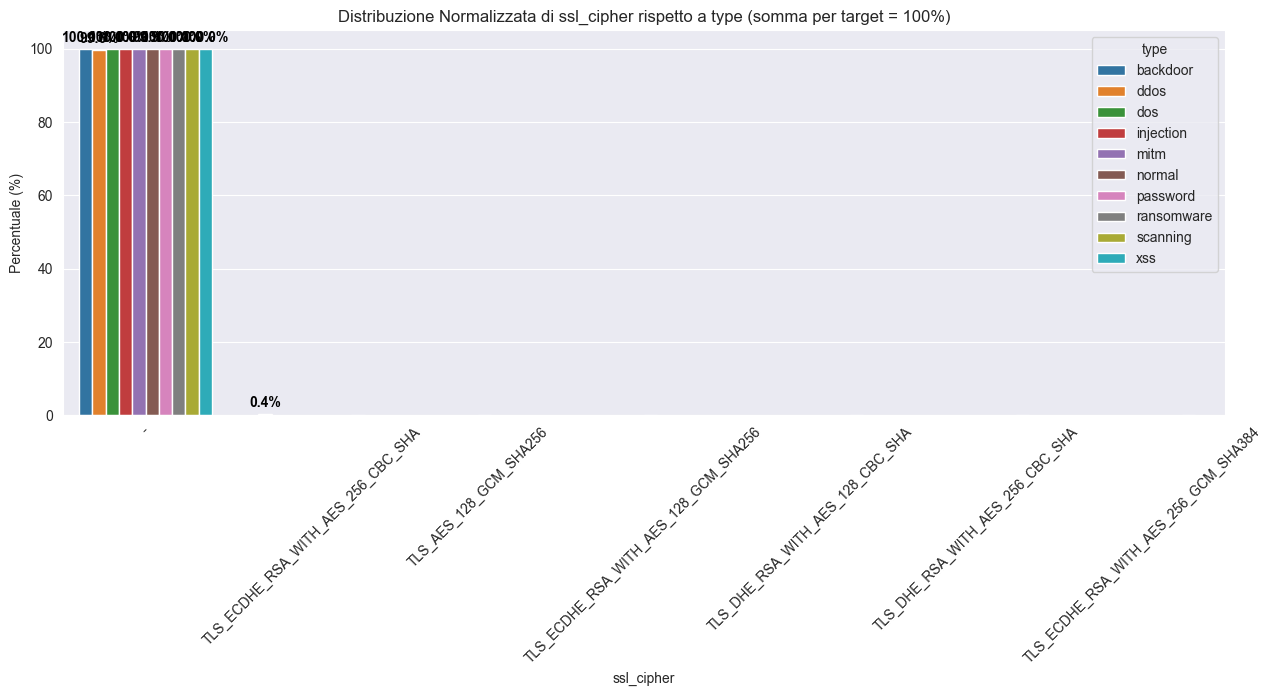

ssl_resumed


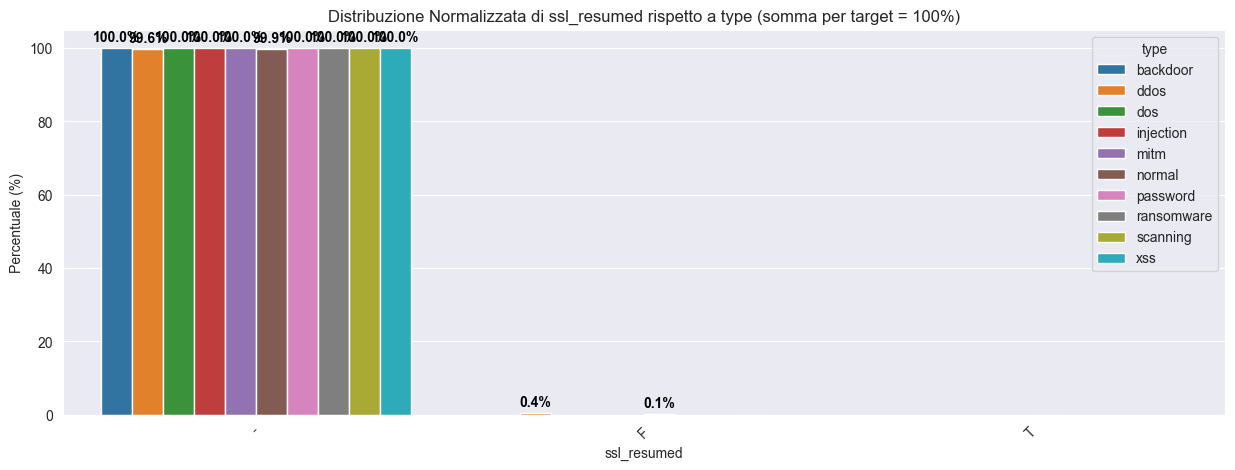

ssl_established


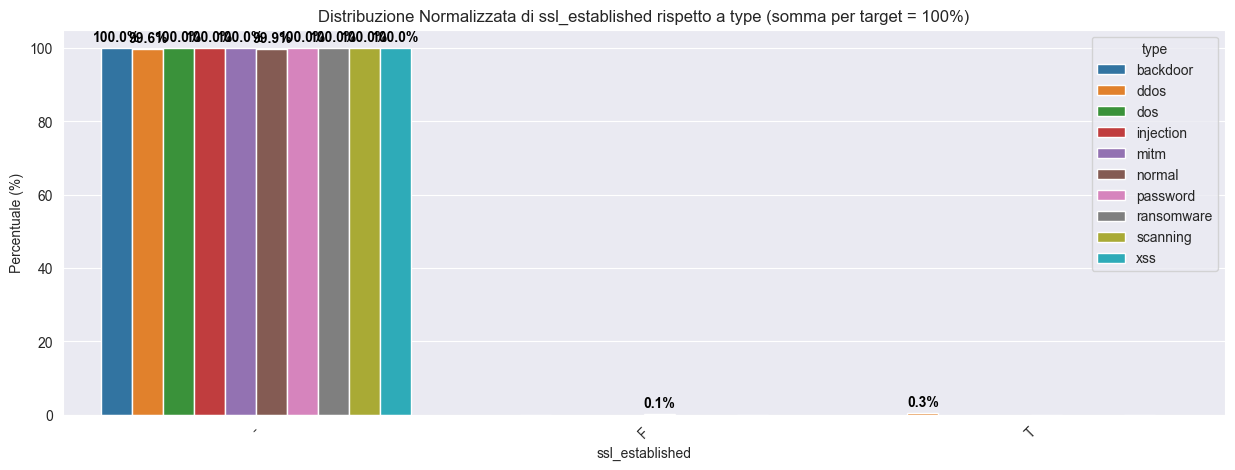

ssl_subject


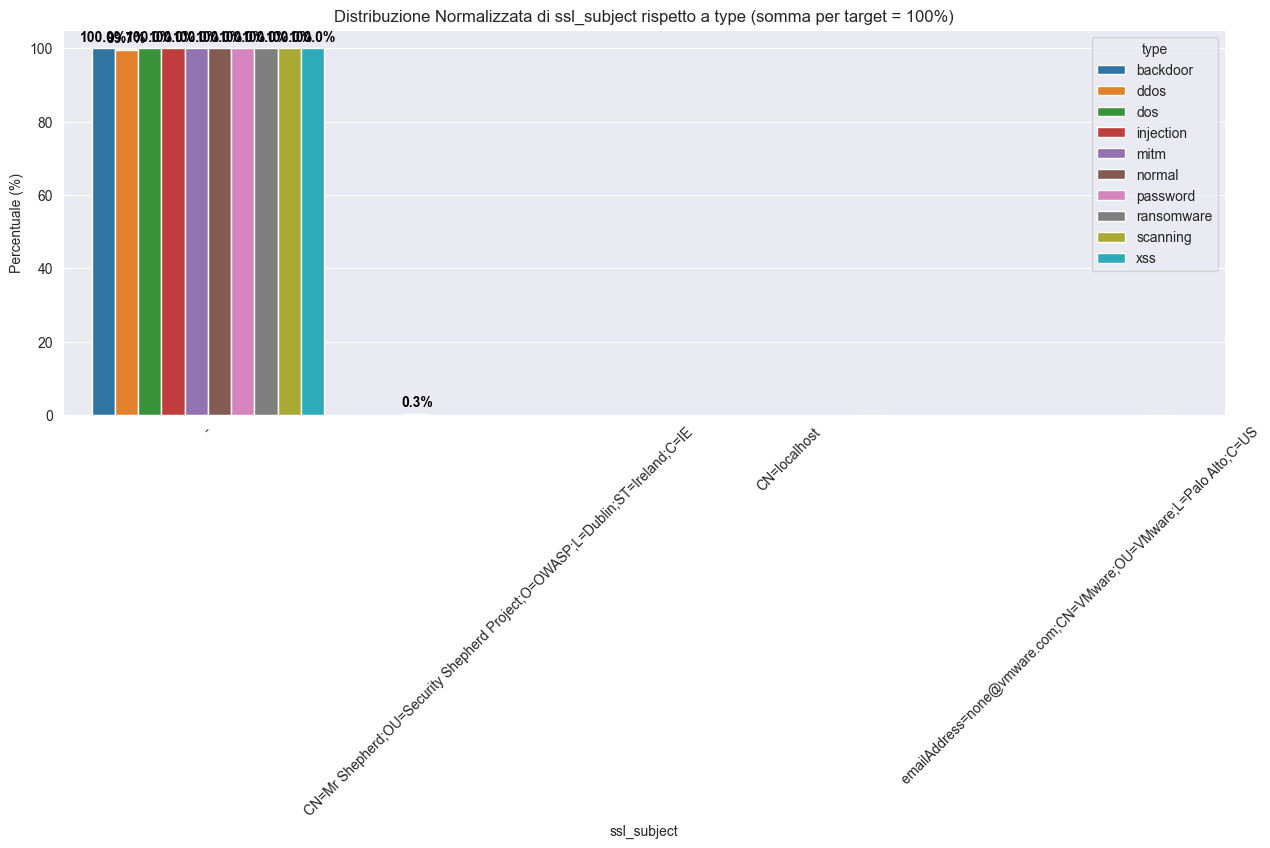

ssl_issuer


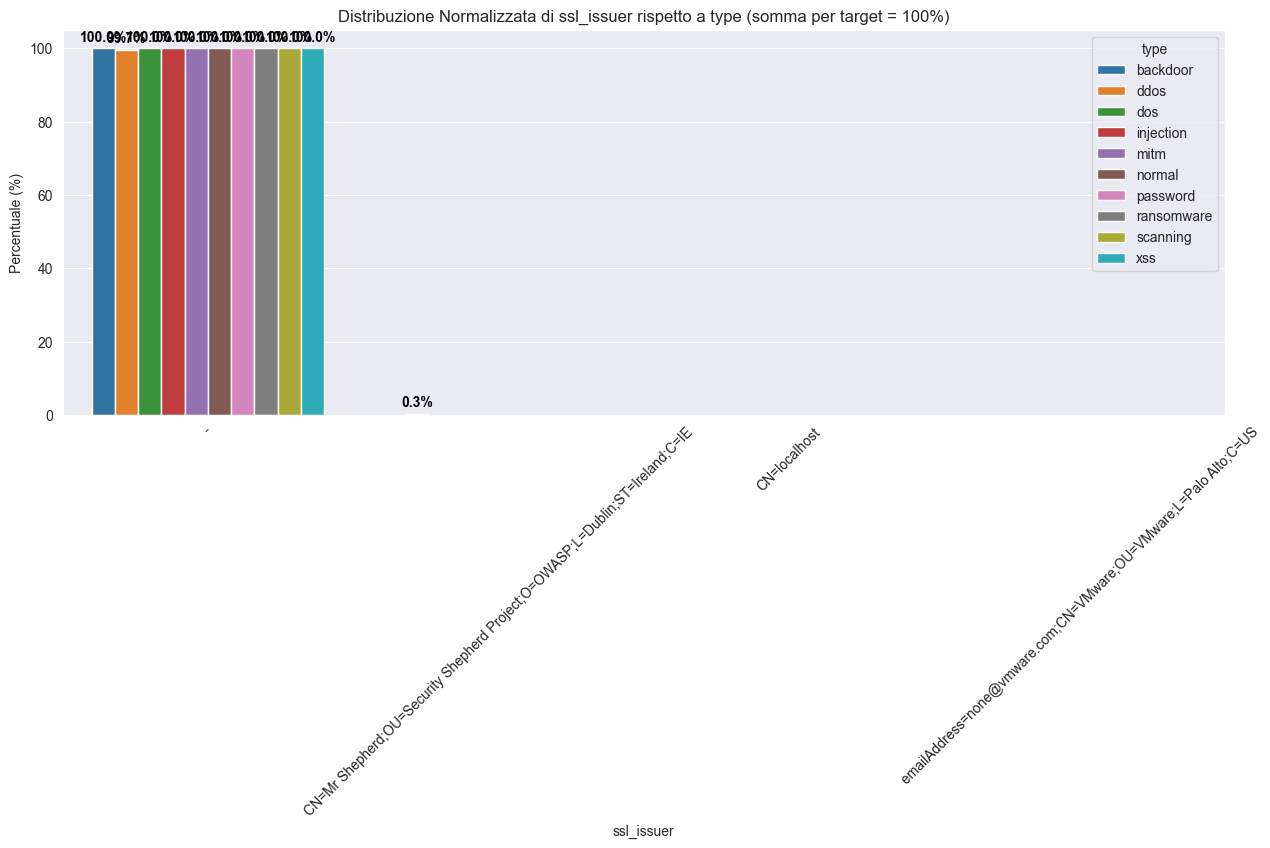

http_trans_depth


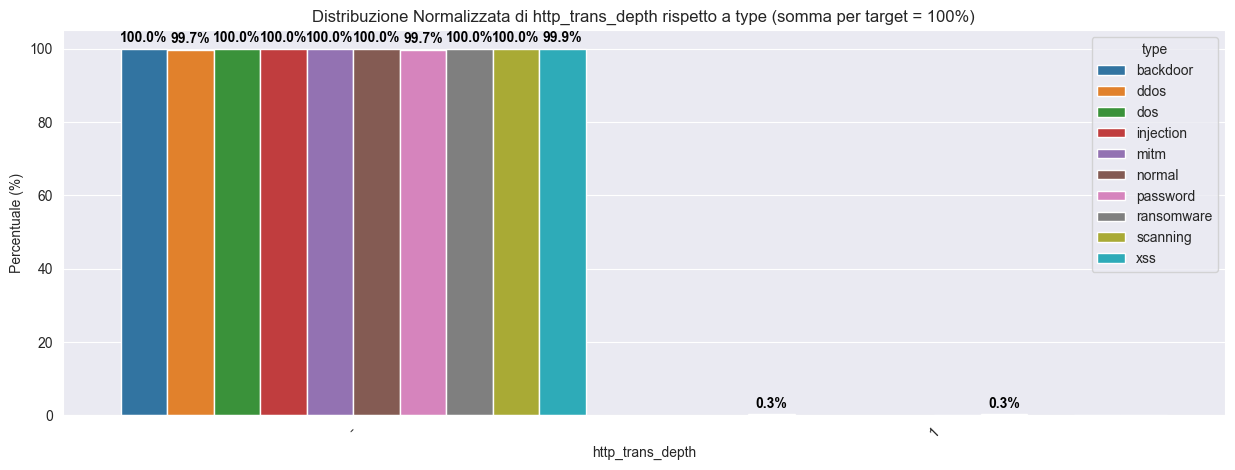

http_method


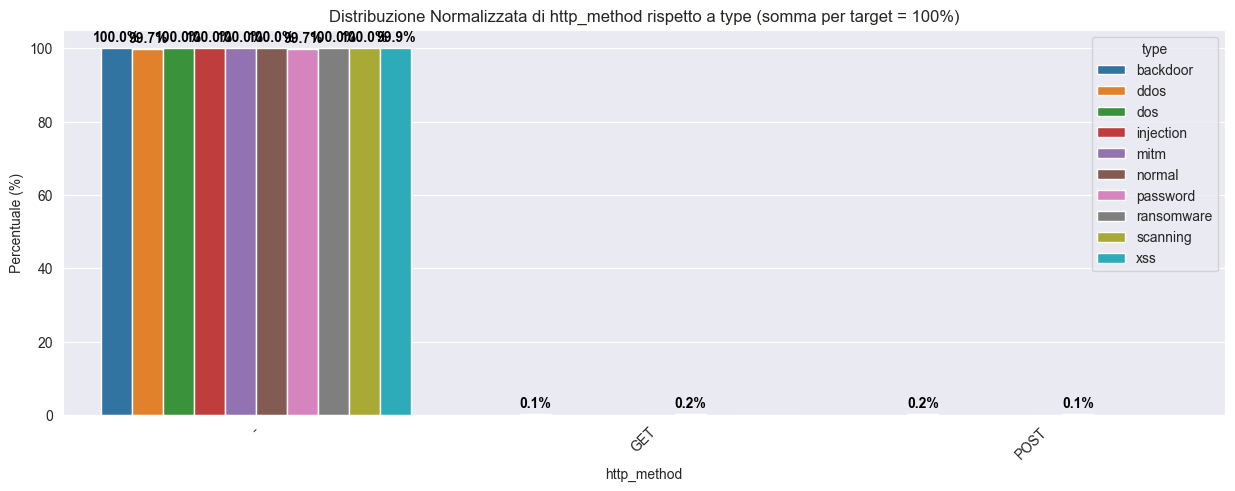

http_referrer


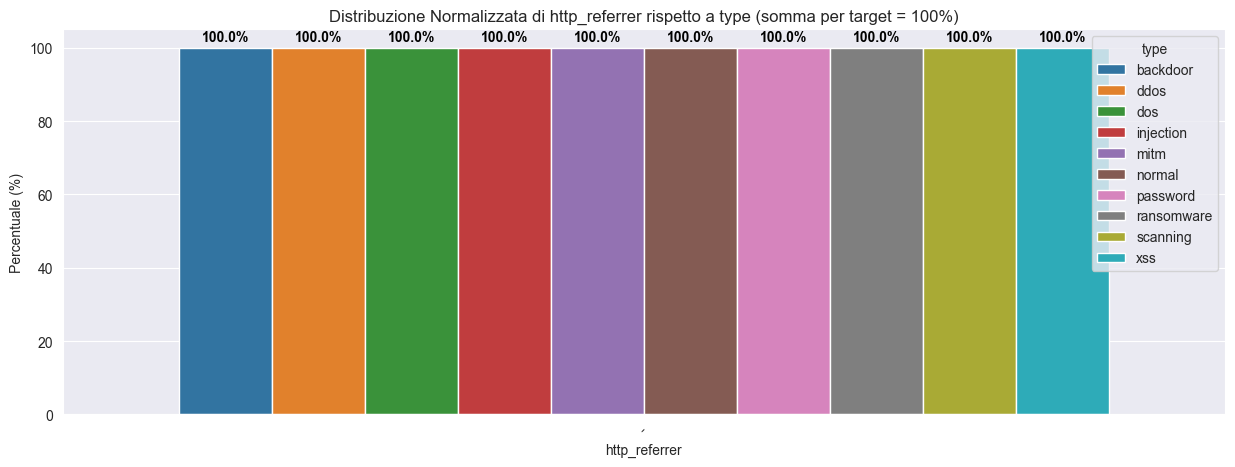

http_version


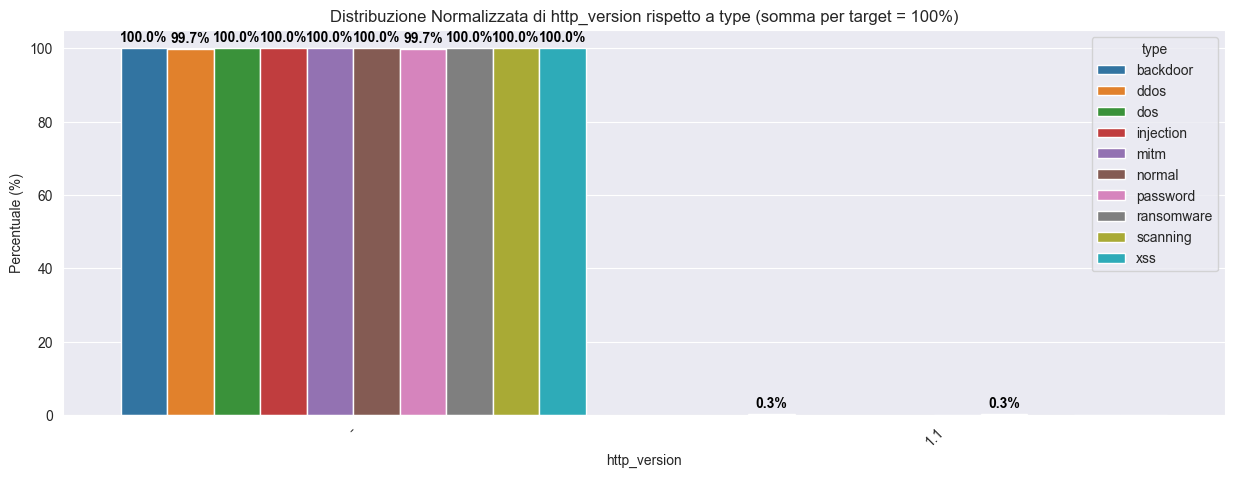

http_orig_mime_types


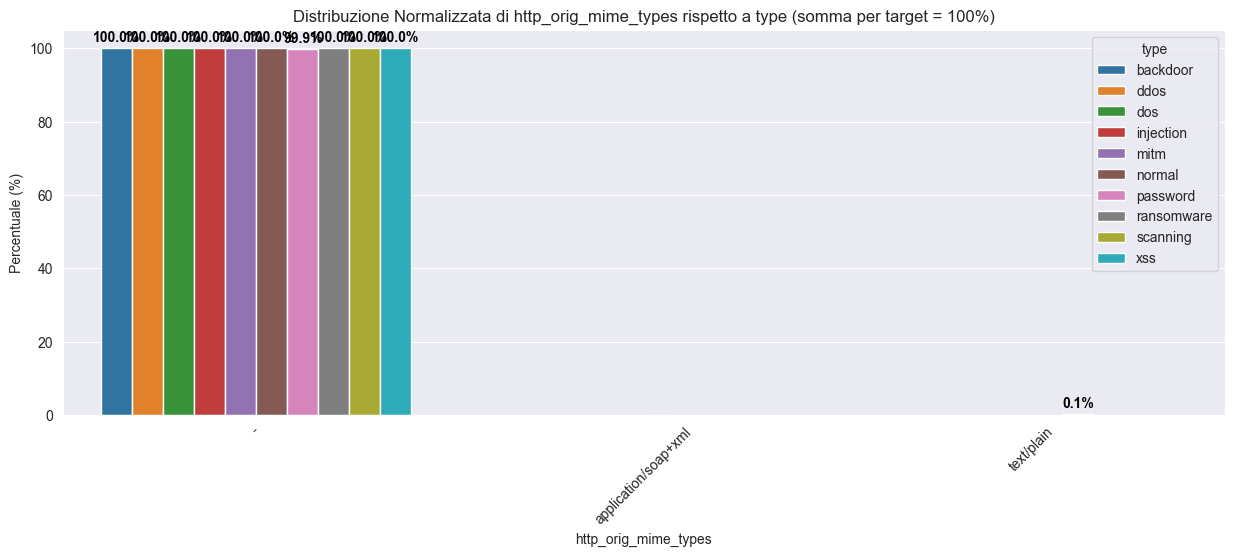

http_resp_mime_types


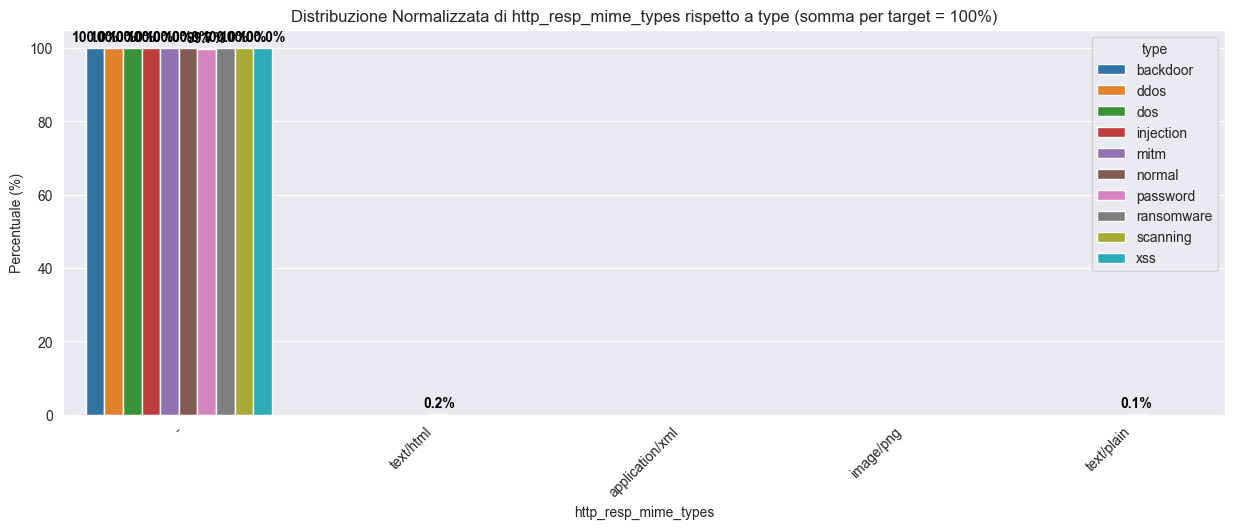

weird_name


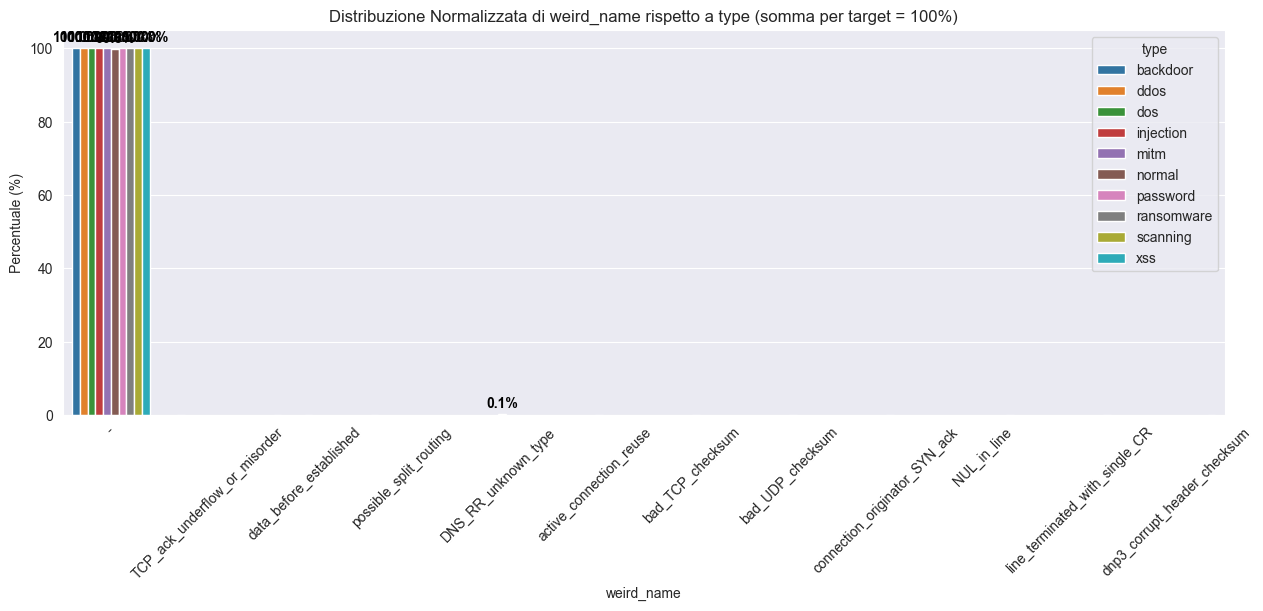

weird_addl


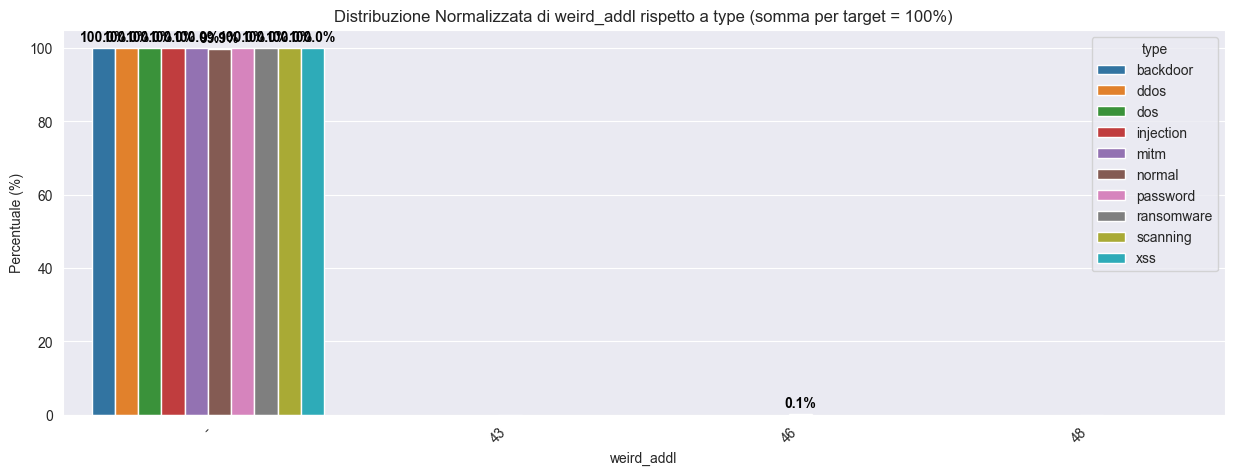

weird_notice


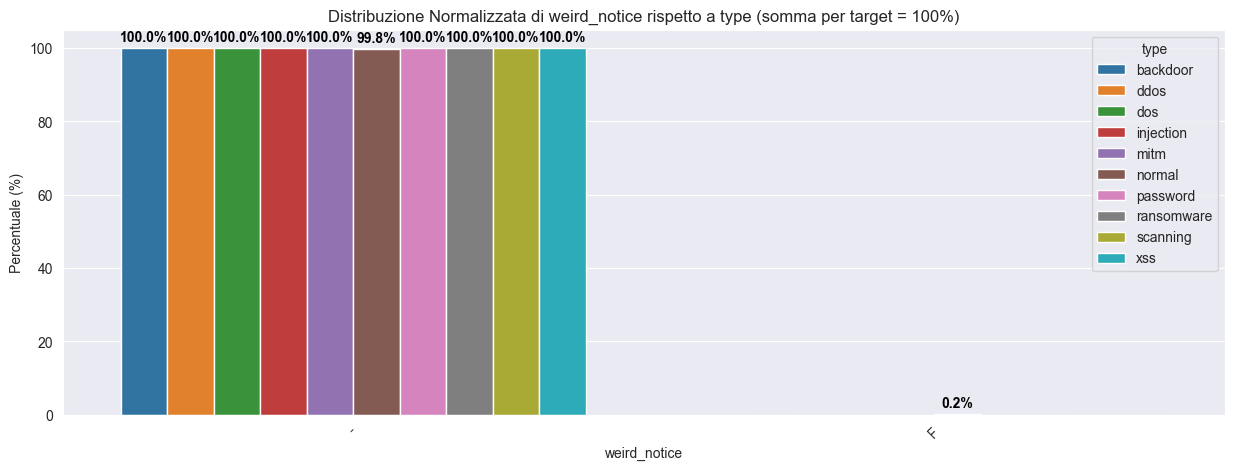

In [9]:
def plot_target_normalized_categorical_distributions(df, categorical_columns, target_column='type', max_unique_values=15):
    for col in categorical_columns:
        if col == target_column:
            continue
        if df[col].nunique() <= max_unique_values:
            print(col)
            plt.figure(figsize=(15, 5))

            # Calcola le proporzioni per ogni categoria della variabile target
            category_counts = df.groupby([target_column, col]).size().reset_index(name='count')
            target_totals = df[target_column].value_counts().reset_index()
            target_totals.columns = [target_column, 'total']

            # Merge per calcolare le percentuali normalizzate
            merged = category_counts.merge(target_totals, on=target_column)
            merged['percentage'] = (merged['count'] / merged['total']) * 100  # Normalizzazione per categoria target

            # Grafico a barre con Seaborn (usiamo una palette più leggibile)
            ax = sns.barplot(data=merged, x=col, y='percentage', hue=target_column, palette='tab10')

            # Aggiungere le percentuali sopra ogni barra
            for p in ax.patches:
                height = p.get_height()
                if height >= 0.1:  # Evita di scrivere 0%
                    ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{height:.1f}%',
                            ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

            plt.xticks(rotation=45)  # Ruota le etichette per leggibilità
            plt.title(f"Distribuzione Normalizzata di {col} rispetto a {target_column} (somma per target = 100%)")
            plt.xlabel(col)
            plt.ylabel("Percentuale (%)")
            plt.legend(title=target_column)
            plt.show()


# Esegui la funzione
plot_target_normalized_categorical_distributions(df1, categorical_columns)

### Contingency Tables and Heatmaps for Selected Categorical Columns
This cell selects specific categorical columns and generates contingency tables for each column with a limited number of unique values. It then normalizes these tables by row sums and creates heatmaps to visualize the normalized contingency tables.

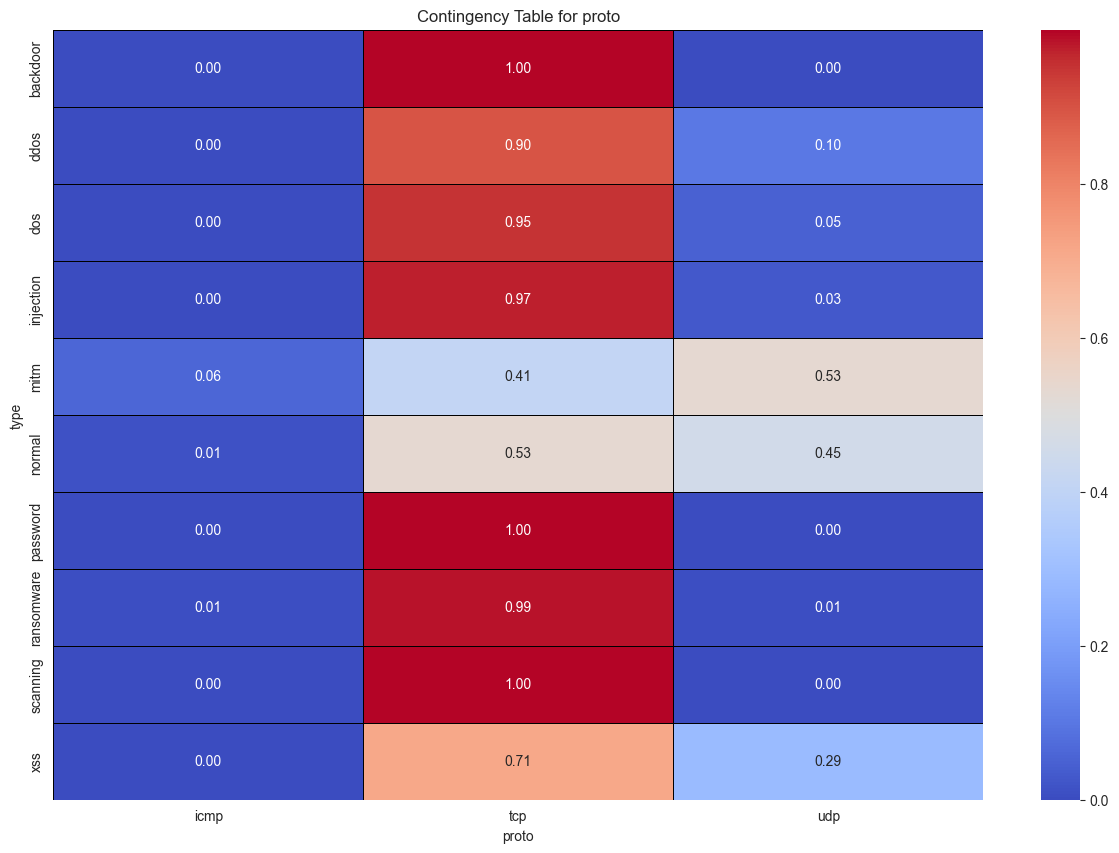

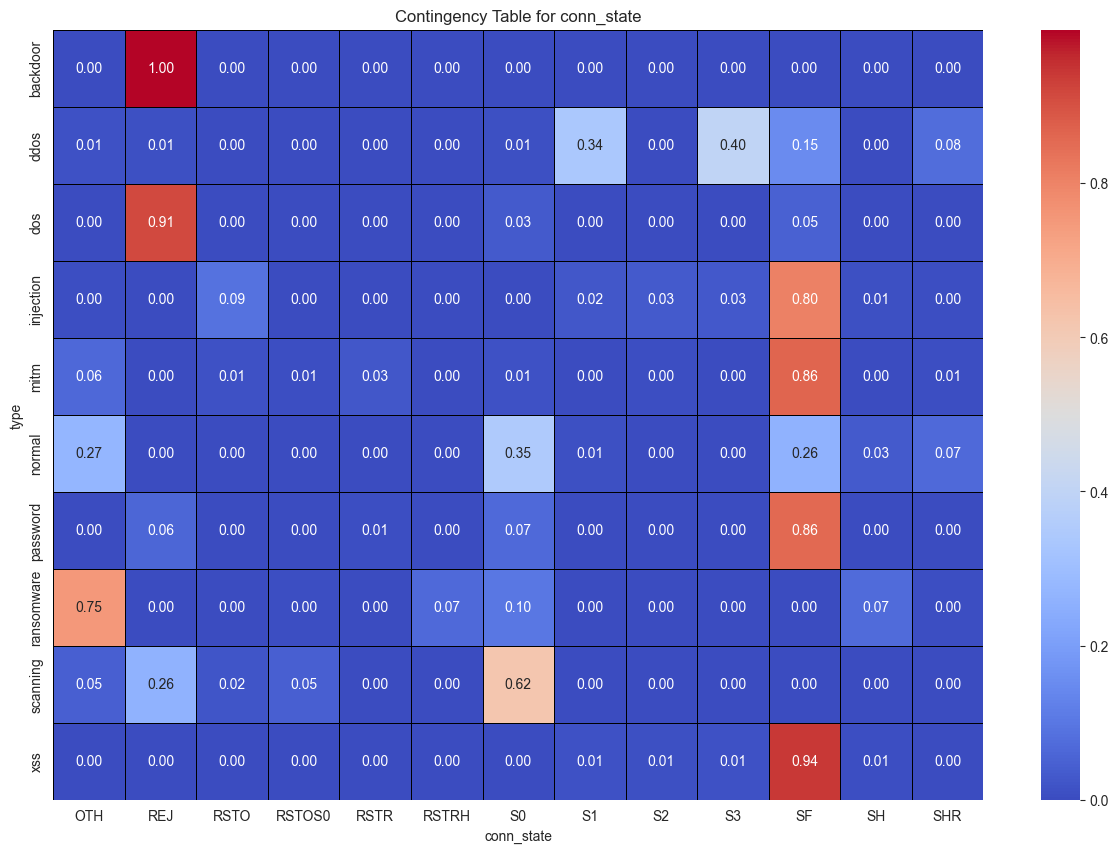

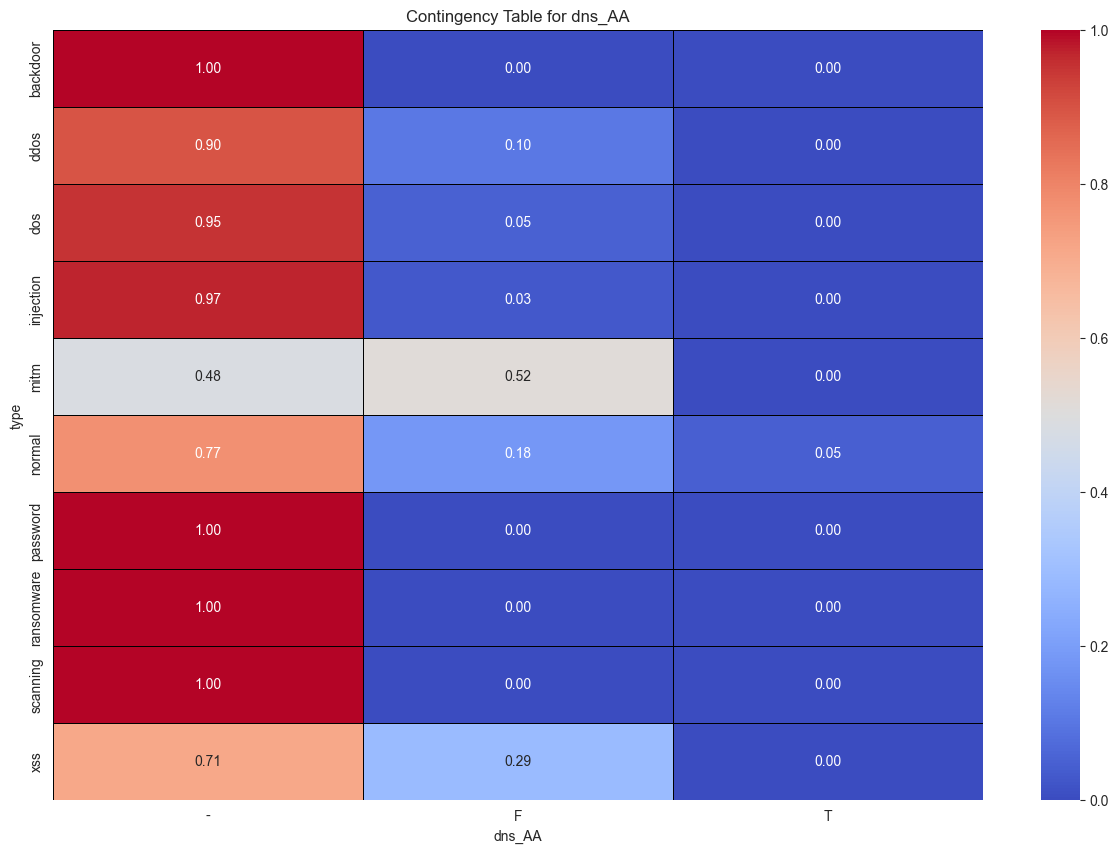

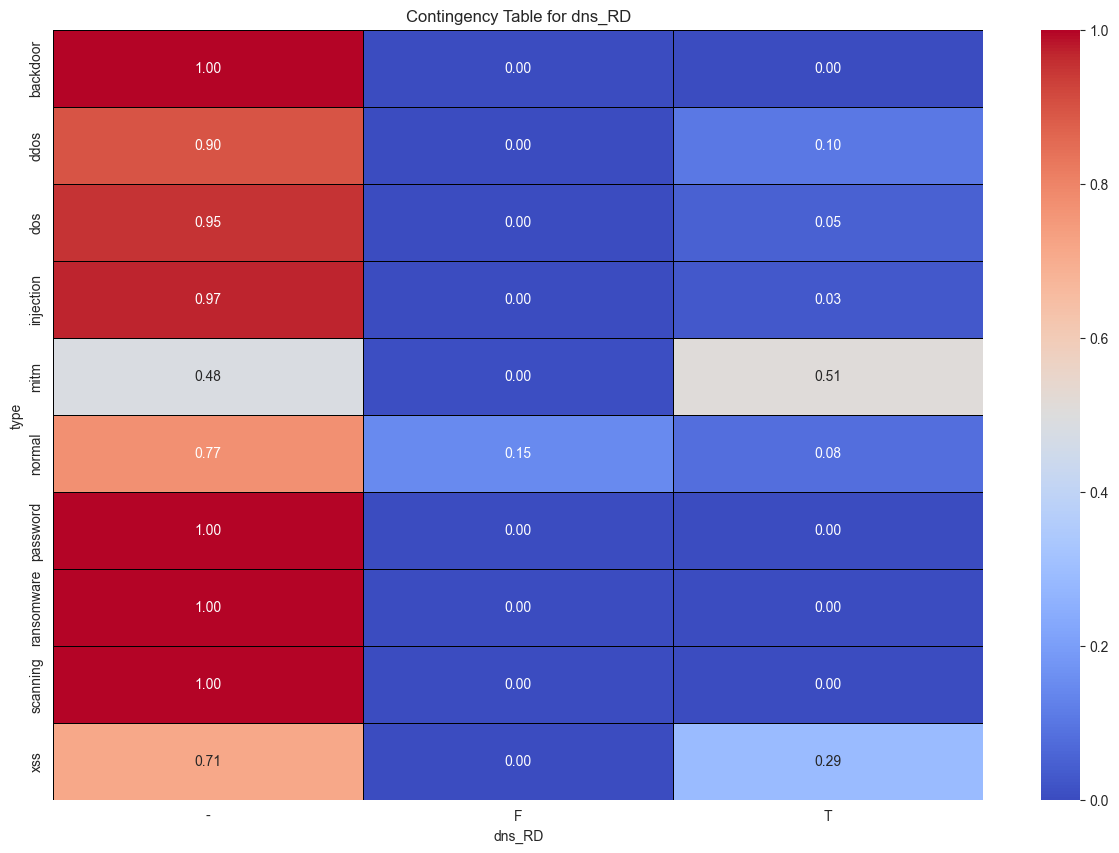

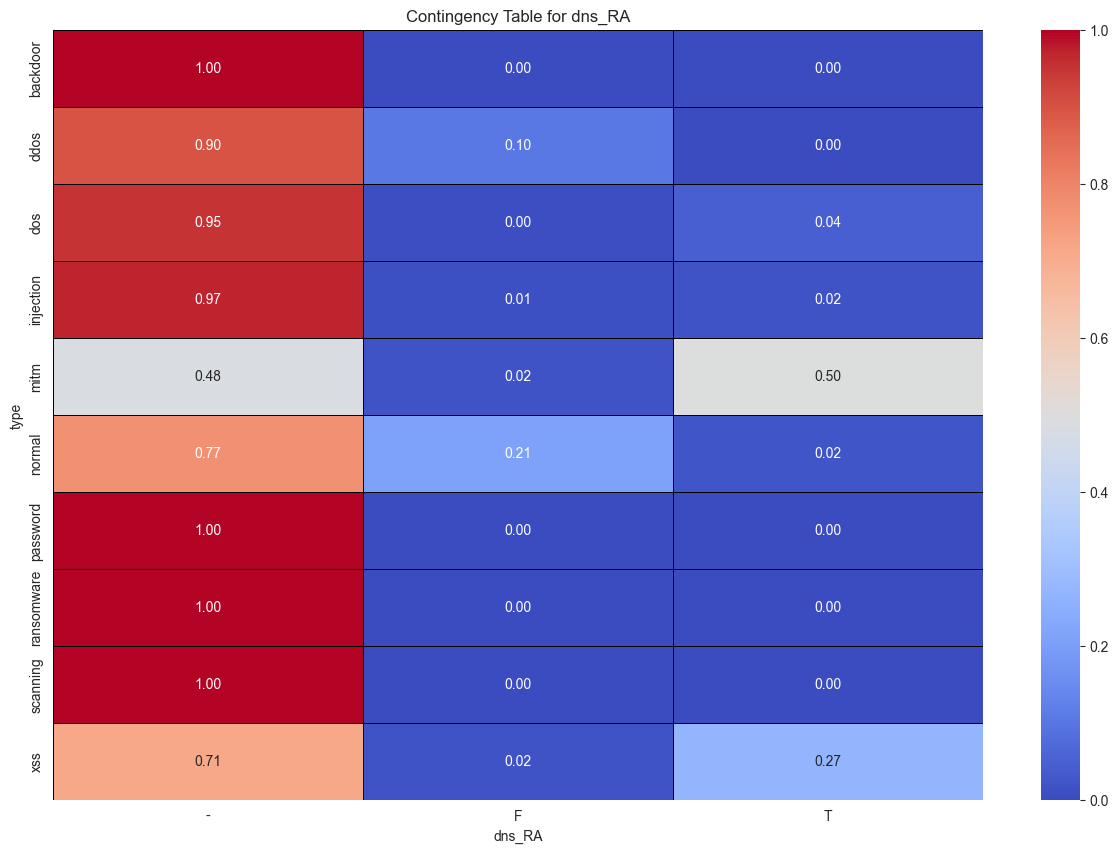

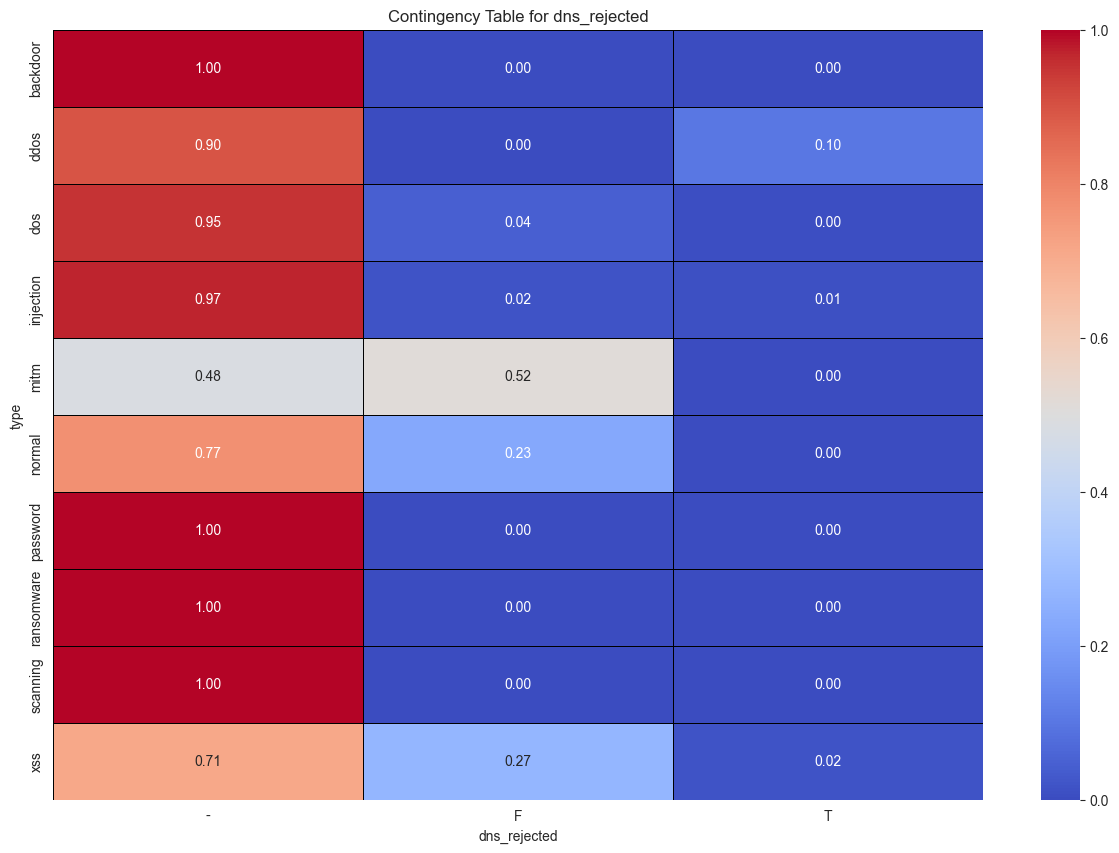

In [10]:
# get categorical columns
chosen_categorical_columns = ["proto", "conn_state", "dns_AA", "dns_RD", "dns_RA", "dns_rejected"]


# contingency table
for column in chosen_categorical_columns:
    if df1[column].nunique() <= 15:
        contingency_table = pd.crosstab(df1["type"], df1[column], )
        percent_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)
        plt.figure(figsize=(15, 10))
        sns.heatmap(percent_table, annot=True, fmt=".2f", cmap='coolwarm', linecolor='black', linewidths=0.5)
        plt.title(f"Contingency Table for {column}")
        plt.show()